In [1]:
# Testing configuration of upper interface of SAMs with different OH- headgroups percentages
# (polarities). The surface is configured as a grid of atoms (C and O)
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
import os
import pdbfile_v2 as pdb

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
########################### SET PARAMETERS FOR THE SIZE ###############################
xcopies = 1
ycopies = 1

Nx = 10 # number of gridpoints in x-direction (carbons)
Ny = 10 # number of gridpoints in y-direction (carbons)

Nx = Nx*xcopies # number of gridpoints in x-direction (carbons)
Ny = Ny*ycopies # number of gridpoints in y-direction (carbons)

a0 = 5.0 # set lattice vector length

In [4]:
# Approximate position of head groups on top of the surface so that the bottom ones are approx. at z=0
CCbondangle = 109.5
CCbondlength = 1.54
N_carbons = 11
zlast = N_carbons*CCbondlength*sin(radians(CCbondangle/2))*cos(np.pi/6) #vertical length of the chain without upper head group
zlast = zlast + 2.0 # add approx. the bond lengths of C-O and H-O (upper head group)
print zlast

13.9805157135


In [5]:
# This function is contained in pdbfile_v2.py!! (can be deleted from here)
"""
########################### FUNCTION SET ALL PARTICLE TYPES TO 'C' ###############################

def C_restart(Nx,Ny):
    pType = np.zeros([Nx,Ny],dtype=str) # particle type

    # set standard particle type as Carbon
    for i in range(Nx):
        for j in range(Ny):
            pType[i,j] = 'C'
    return pType
"""

"\n########################### FUNCTION SET ALL PARTICLE TYPES TO 'C' ###############################\n\ndef C_restart(Nx,Ny):\n    pType = np.zeros([Nx,Ny],dtype=str) # particle type\n\n    # set standard particle type as Carbon\n    for i in range(Nx):\n        for j in range(Ny):\n            pType[i,j] = 'C'\n    return pType\n"

In [6]:
# This function is contained in pdbfile_v2.py!! (can be deleted from here)
"""
########################### FUNCTION TO CREATE GRID ###########################
def creategrid(a0, Nx, Ny):
    # set particle x- and y- coordinates
    # !!!! later move to create_top_surface.ipynb !!!


    # First basis vector V = (Vx,Vy)
    Vx = a0
    Vy = 0
    # Second basis vector W = (Wx,Wy) 
    Wx = a0*np.sin(np.pi/6)
    Wy = a0*np.cos(np.pi/6)

    # create arrays that hold particle positions
    xPos = np.zeros([Nx,Ny],dtype=float) # x positions of particles
    yPos = np.zeros([Nx,Ny],dtype=float) # y positions of particles
    
    ########################### TYPE 1 OF GRID #############################################

    for j in range(Ny):
        for i in range(Nx):
            xPos[i,j] = i*Vx + j*Wx
            yPos[i,j] = i*Vy + j*Wy 
            
    #for j in range(1,Ny):
        #for i in range(Nx):  # Here we move the last particles of almost each line to get a more rectangular surface shape
            #if xPos[i,j]>xPos[-1,1]:
                #xPos[i,j] = xPos[i-Nx+1,j-2]

    return xPos, yPos
"""

'\n########################### FUNCTION TO CREATE GRID ###########################\ndef creategrid(a0, Nx, Ny):\n    # set particle x- and y- coordinates\n    # !!!! later move to create_top_surface.ipynb !!!\n\n\n    # First basis vector V = (Vx,Vy)\n    Vx = a0\n    Vy = 0\n    # Second basis vector W = (Wx,Wy) \n    Wx = a0*np.sin(np.pi/6)\n    Wy = a0*np.cos(np.pi/6)\n\n    # create arrays that hold particle positions\n    xPos = np.zeros([Nx,Ny],dtype=float) # x positions of particles\n    yPos = np.zeros([Nx,Ny],dtype=float) # y positions of particles\n    \n    ########################### TYPE 1 OF GRID #############################################\n\n    for j in range(Ny):\n        for i in range(Nx):\n            xPos[i,j] = i*Vx + j*Wx\n            yPos[i,j] = i*Vy + j*Wy \n            \n    #for j in range(1,Ny):\n        #for i in range(Nx):  # Here we move the last particles of almost each line to get a more rectangular surface shape\n            #if xPos[i,j]>xPos[-1,1]:

In [7]:
################################## FUNCTION TO PLOT HEAT MAP  ######################################
def plotheat(pType, pc, Nx, Ny, loop):
    # HEATMAP
    #   create array with 0s where there is O
    #   and ones where there is C:
    Z = np.zeros([Nx,Ny],dtype=int)
    for i in range(Nx):
        for j in range(Ny):
            if pType[i,j] == 'C':
                Z[i,j] = 1
    
    # plot the heatmap
    fig, ax = plt.subplots()
    ax.imshow(Z, cmap=plt.cm.winter, interpolation='nearest')
              
    myfile = 'pc' + str(int(pc*100)) + '_heat_'+ str(loop) +'.pdf'
    n = 1
    while os.path.isfile(myfile): # If file exists, change file name
        myfile = 'pc' + str(int(pc*100)) + '_heat_'+ str(loop) +'_'+ str(n) + '.pdf'
        n = n + 1
    fig.savefig(myfile ,format='pdf')

In [8]:
################################## FUNCTION TO PLOT GRID  ######################################
def plotgrid(pType, a0, pc, Nx, Ny, text, loop):
    
    xPos, yPos = pdb.creategrid(a0, Nx, Ny)
    
    SizeOfDots = 8
    fig, ax = plt.subplots()
    for i in range(Nx):
        for j in range(Ny):
            if pType[i,j] == 'O':
                ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='blue')
            else:
                ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='yellow')
                
    plt.title("Pc = " + str(int(pc*100)) + text, fontsize= 14)
    plt.grid()
    plt.show()
    myfile = 'pc' + str(int(pc*100)) + '_grid_'+ str(loop) +'.pdf'
    n = 1
    while os.path.isfile(myfile): # If file exists, change file name
        myfile = 'pc' + str(int(pc*100)) + '_grid_'+ str(loop) +'_'+ str(n) + '.pdf'
        n = n + 1
    fig.savefig(myfile ,format='pdf')

In [9]:
def loop1(xinterval,yinterval, Nx, Ny):
    pType = pdb.C_restart(Nx,Ny)
    n_oxys = 0
    for k in range(0,Nx,yinterval*2):
        for l in range(0,Ny,xinterval*2):
            if pType[k,l]=='C':
                pType[k,l] = 'O' 
                n_oxys = n_oxys + 1
    for k in range(yinterval,Nx,xinterval*2):
        for l in range(xinterval,Ny,xinterval*2):
            if pType[k,l]=='C':
                pType[k,l] = 'O' 
                n_oxys = n_oxys + 1
    pc = float(n_oxys)/float(Nx*Ny)
    return pType, pc

def loop2(xinterval,yinterval, Nx, Ny):
    pType = pdb.C_restart(Nx,Ny)
    n_oxys = 0
    for l in range(0,Ny,yinterval):
        for k in range(0,Nx,xinterval-1):
            if pType[k,l]=='C':
                pType[k,l] = 'O' 
                n_oxys = n_oxys + 1
    pc = float(n_oxys)/float(Nx*Ny)
    return pType, pc

def loop3(xinterval,yinterval, Nx, Ny):
    pType = pdb.C_restart(Nx,Ny)
    n_oxys =0
    for l in range(0,Ny,yinterval):
        for k in range(0,Nx,xinterval):
            if pType[k,l]=='C':
                pType[k,l] = 'O' 
                n_oxys = n_oxys + 1
    pc = float(n_oxys)/float(Nx*Ny)
    return pType, pc

def loop4(xintervalA,xintervalB,xintervalC,yintervalA,yintervalB,yintervalC,Nx, Ny):
    pType = pdb.C_restart(Nx,Ny)
    n_oxys = 0
    for l in range(0,Ny,yintervalA):
        for k in range(0,Nx,xintervalA):
            if pType[k,l]=='C':
                pType[k,l] = 'O' 
                n_oxys = n_oxys + 1
    for l in range(1,Ny,yintervalB):
        for k in range(1,Nx,xintervalB):
            if pType[k,l]=='C':
                pType[k,l] = 'O' 
                n_oxys = n_oxys + 1   
    for l in range(2,Ny,yintervalC):
        for k in range(2,Nx,xintervalC):
            if pType[k,l]=='C':
                pType[k,l] = 'O' 
                n_oxys = n_oxys + 1
    pc = float(n_oxys)/float(Nx*Ny)
    return pType, pc

def loop5(xintervalA,yintervalA,xintervalB,yintervalB, Nx, Ny):
    pType = pdb.C_restart(Nx,Ny)
    n_oxys = 0
    for l in range(0,Ny,yintervalA):
        for k in range(0,Nx,xintervalA):
            if pType[k,l]=='C':
                pType[k,l] = 'O' 
                n_oxys = n_oxys + 1
    for l in range(1,Ny,yintervalB):
        for k in range(2,Nx,xintervalB):
            if pType[k,l]=='C':
                pType[k,l] = 'O' 
                n_oxys = n_oxys + 1
    pc = float(n_oxys)/float(Nx*Ny)
    return pType, pc

In [10]:

########################### EXCHANGE CARBONS WITH OXYGENS #############################

In [11]:
path = "/Users/eixeres/Desktop/PlotsLoops/"
path = "/Users/eixeres/Desktop/PlotsLoops_straight/"
#path = "/Users/burbol2/Desktop/PlotsLoops/loop3/"
os.chdir(path)

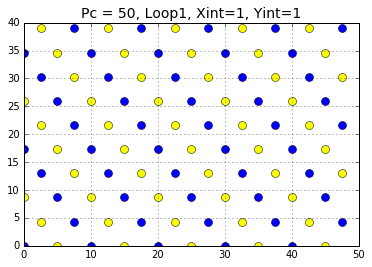

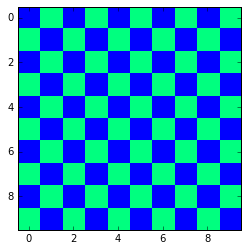

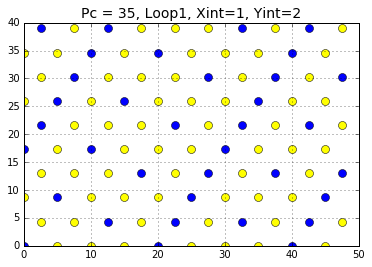

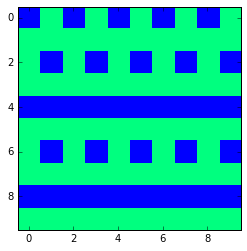

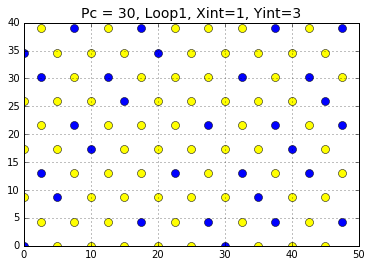

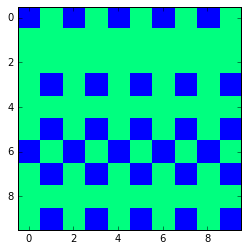

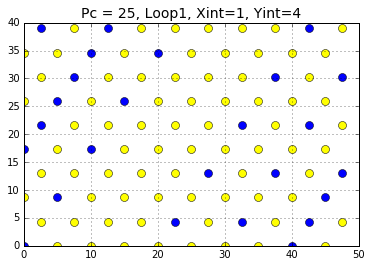

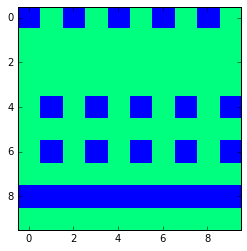

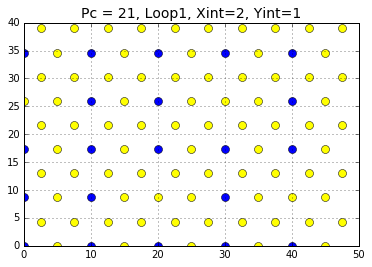

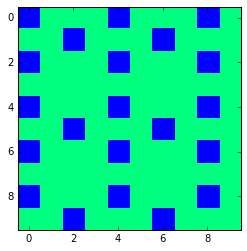

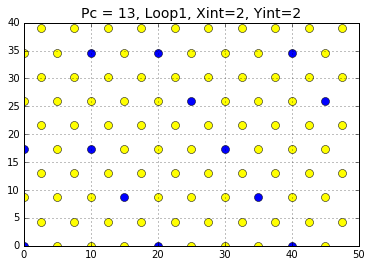

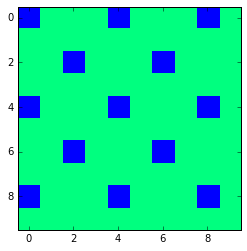

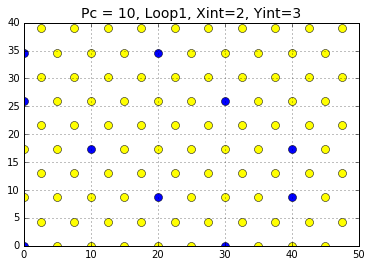

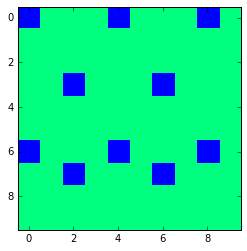

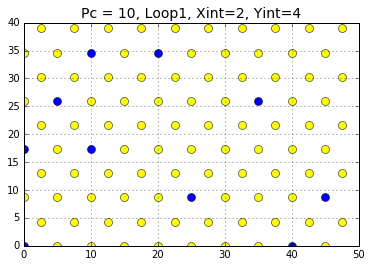

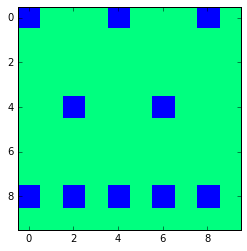

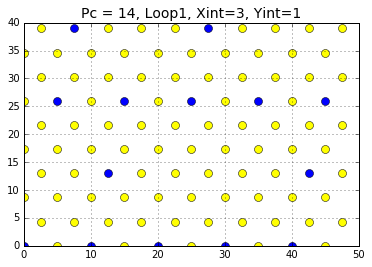

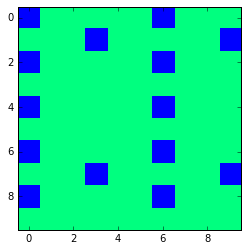

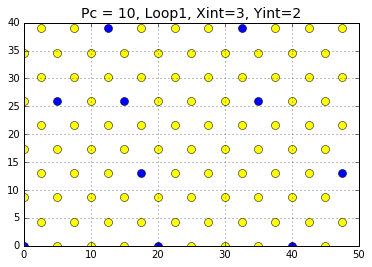

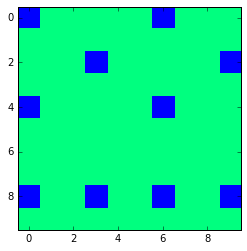

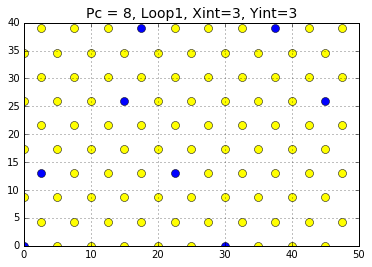

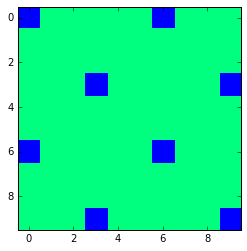

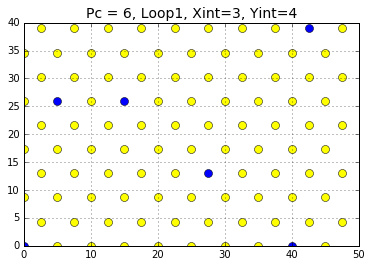

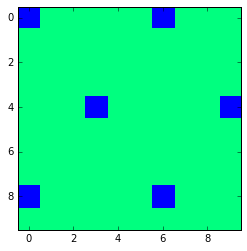

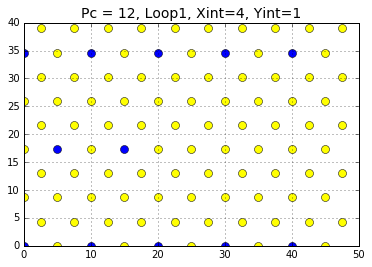

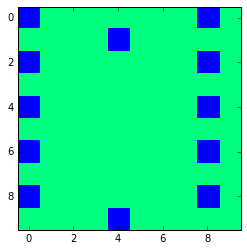

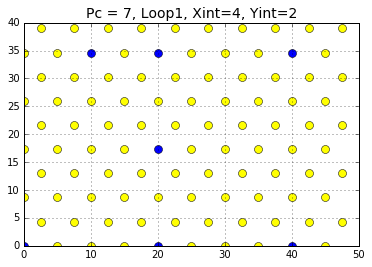

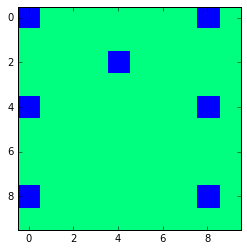

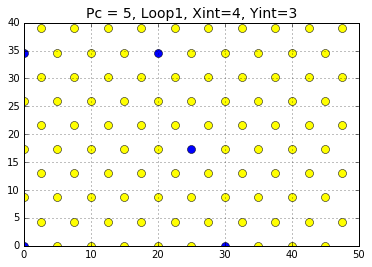

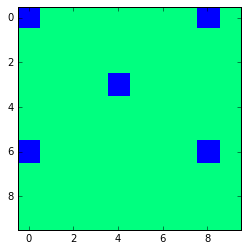

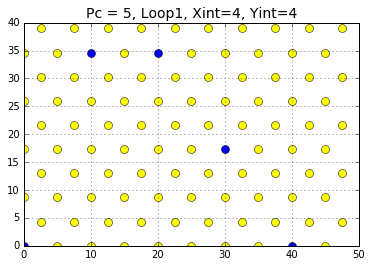

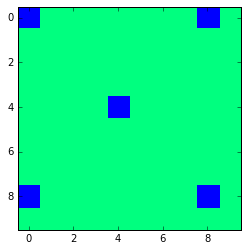

In [12]:
loop = 'loop1'
for xinterval in range(1,5):
    for yinterval in range(1,5):            
        pType, pc = loop1(xinterval,yinterval, Nx, Ny)        
        mytext = ', Loop1, Xint='+ str(xinterval)+', Yint='+str(yinterval)
        plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
        plotheat(pType, pc, Nx, Ny, loop)

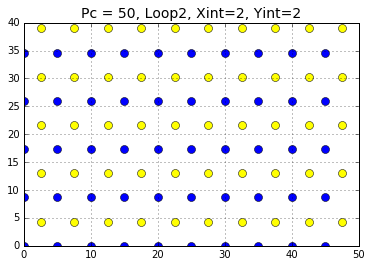

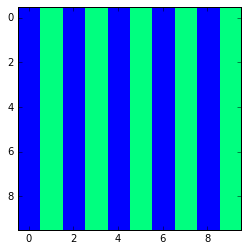

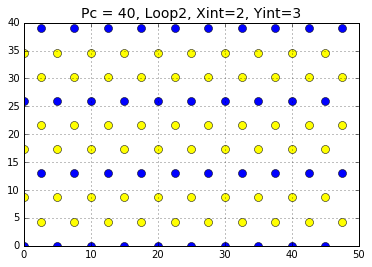

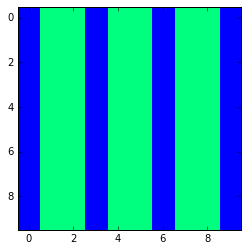

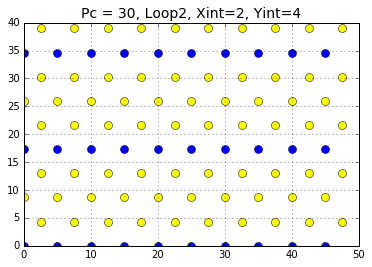

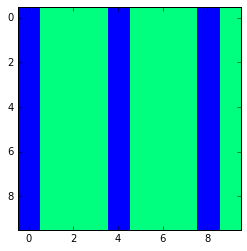

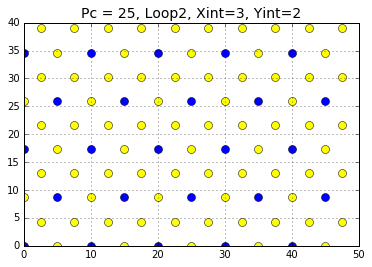

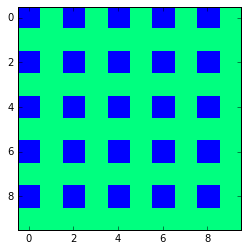

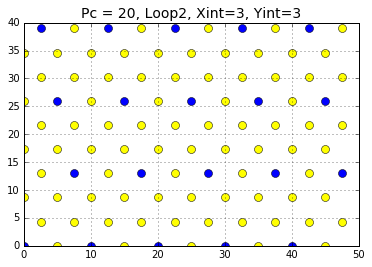

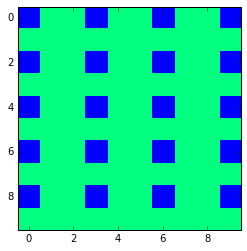

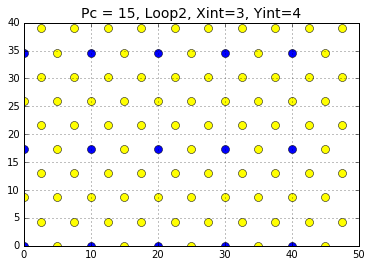

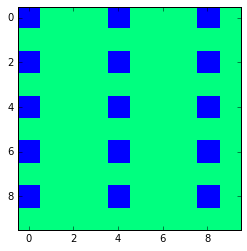

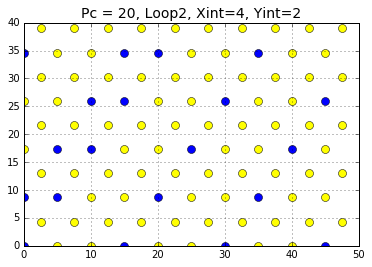

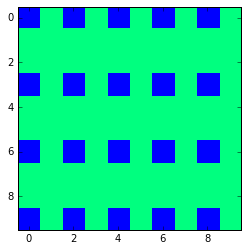

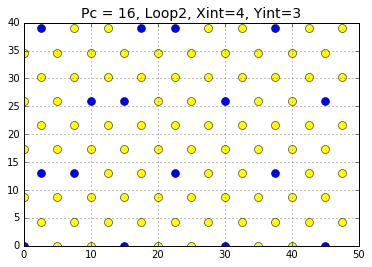

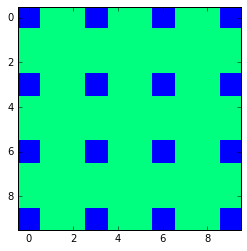

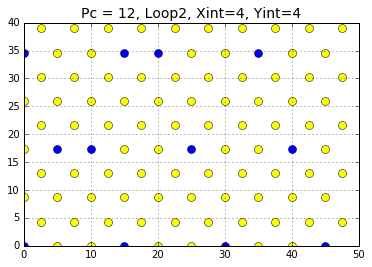

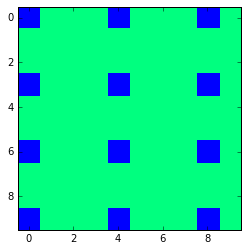

In [13]:
loop = 'loop2'
for xinterval in range(2,5):
    for yinterval in range(2,5):
        pType, pc = loop2(xinterval,yinterval, Nx, Ny)
        mytext = ', Loop2, Xint='+ str(xinterval)+', Yint='+str(yinterval)
        plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
        plotheat(pType, pc, Nx, Ny, loop)

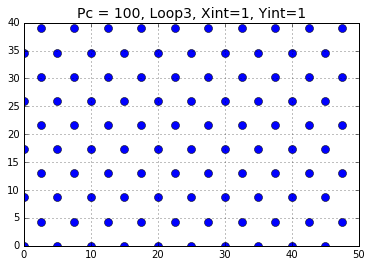

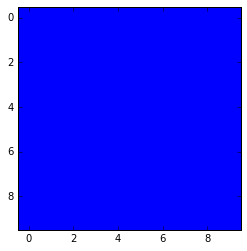

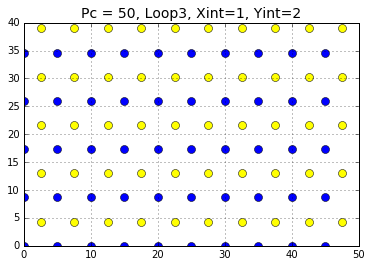

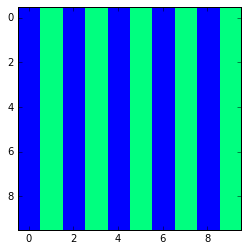

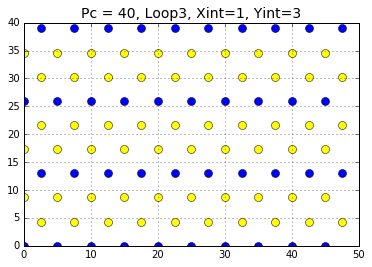

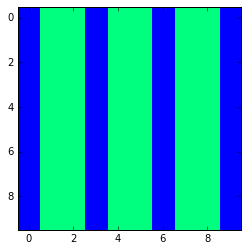

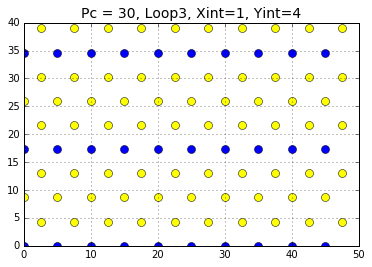

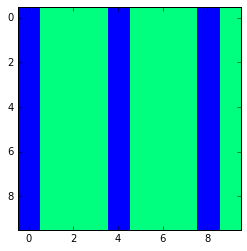

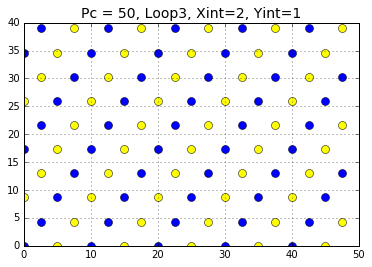

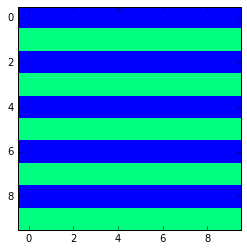

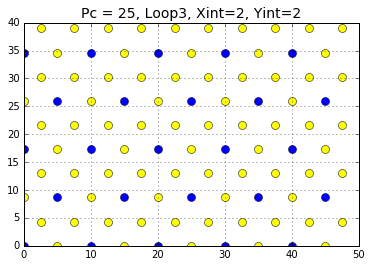

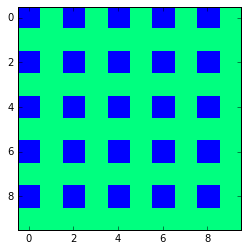

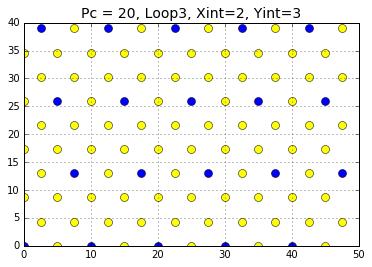

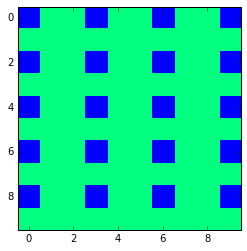

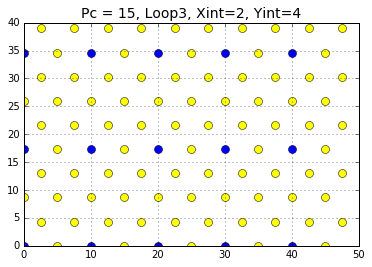

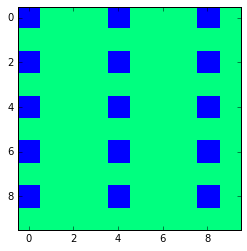

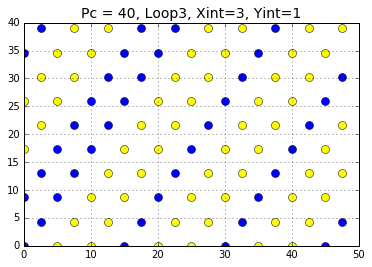

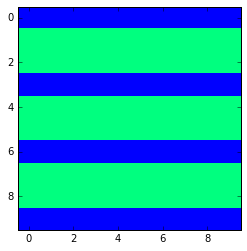

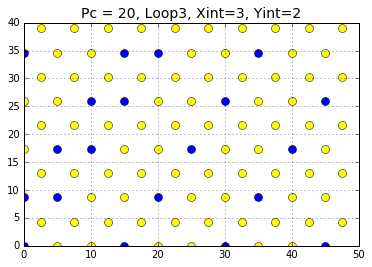

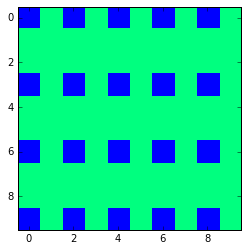

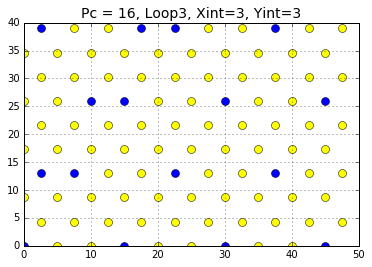

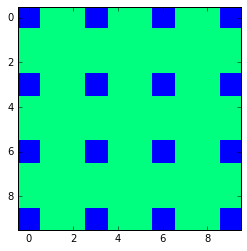

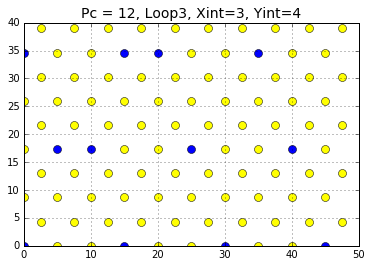

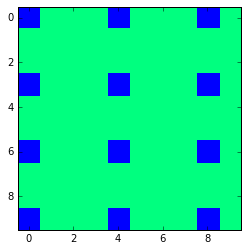

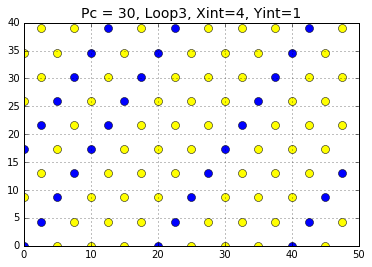

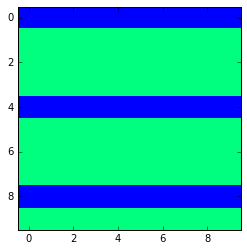

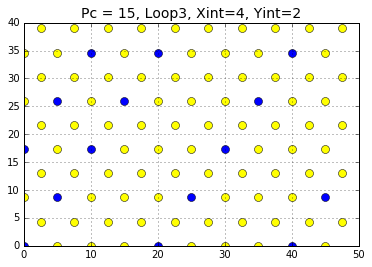

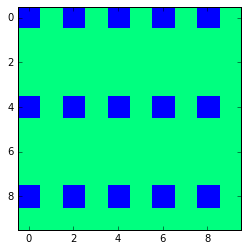

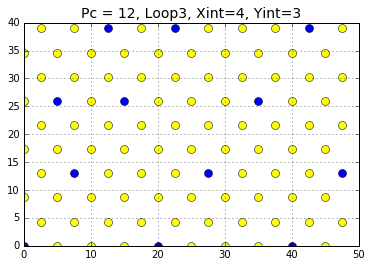

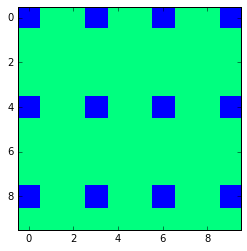

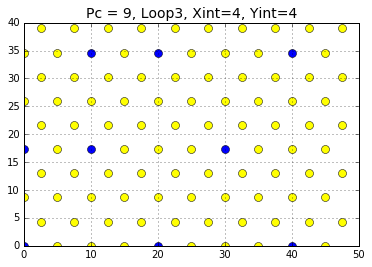

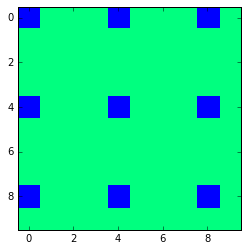

In [14]:
loop = 'loop3'
for xinterval in range(1,5):
    for yinterval in range(1,5):
        pType, pc = loop3(xinterval,yinterval, Nx, Ny)
        mytext = ', Loop3, Xint='+ str(xinterval)+', Yint='+str(yinterval)
        plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
        plotheat(pType, pc, Nx, Ny, loop)

In [15]:
# Commented only because output is too long, but this cell is ok -> uncomment if necessary
"""
loop = 'loop4'
for yintervalA in range(1,5):
    for xintervalA in range(2,5):
        for yintervalB in range(1,5):
            for xintervalB in range(2,5):
                for yintervalC in range(1,5):
                    for xintervalC in range(2,5):
                        pType, pc = loop4(xintervalA,xintervalB,xintervalC,yintervalA,yintervalB,yintervalC,Nx, Ny)
                        mytext = ', L4, Xa='+ str(xintervalA)+' Ya='+str(yintervalA)+' Xb='+ str(xintervalB)+' Yb='+str(yintervalB)+' Xc='+ str(xintervalC)+' Yc='+str(yintervalC)
                        plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
                        plotheat(pType, pc, Nx, Ny, loop)
"""

"\nloop = 'loop4'\nfor yintervalA in range(1,5):\n    for xintervalA in range(2,5):\n        for yintervalB in range(1,5):\n            for xintervalB in range(2,5):\n                for yintervalC in range(1,5):\n                    for xintervalC in range(2,5):\n                        pType, pc = loop4(xintervalA,xintervalB,xintervalC,yintervalA,yintervalB,yintervalC,Nx, Ny)\n                        mytext = ', L4, Xa='+ str(xintervalA)+' Ya='+str(yintervalA)+' Xb='+ str(xintervalB)+' Yb='+str(yintervalB)+' Xc='+ str(xintervalC)+' Yc='+str(yintervalC)\n                        plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)\n                        plotheat(pType, pc, Nx, Ny, loop)\n"

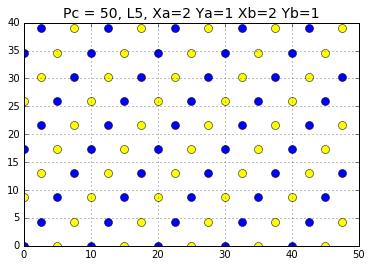

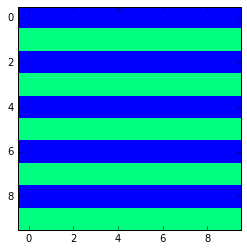

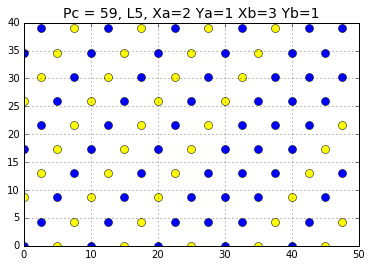

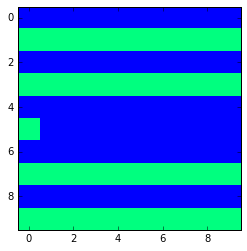

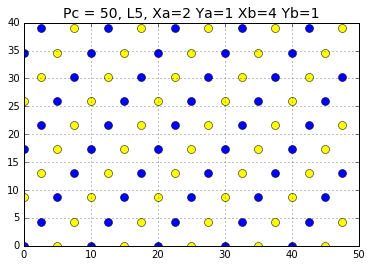

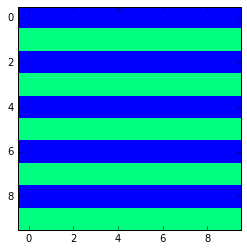

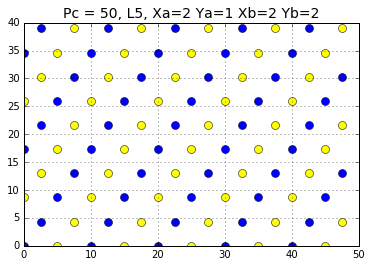

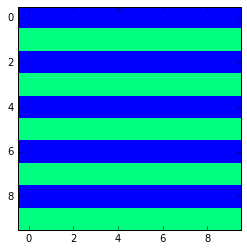

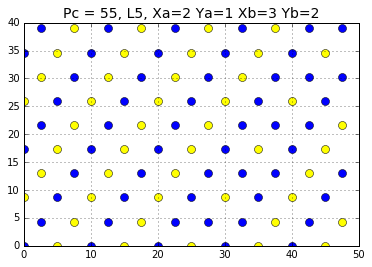

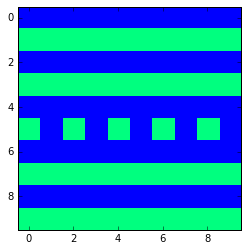

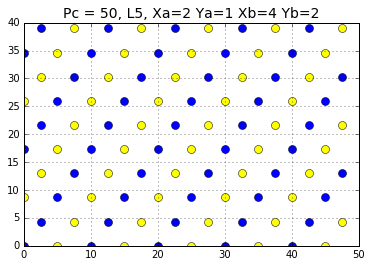

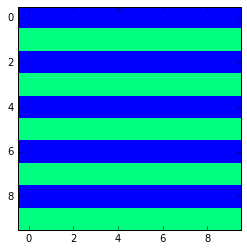

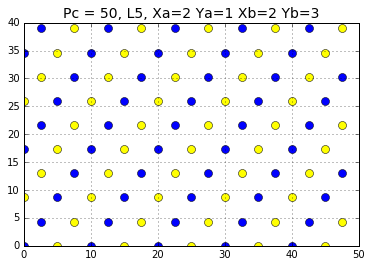

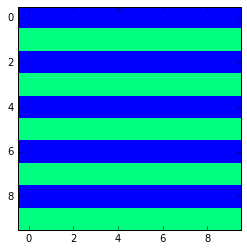

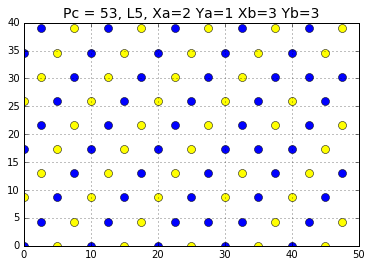

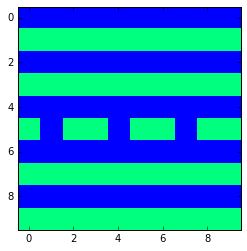

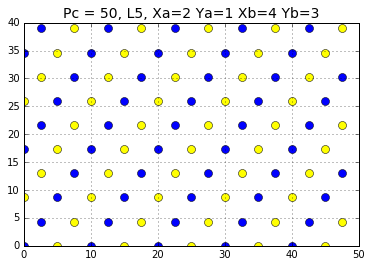

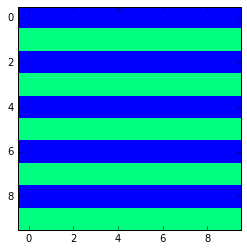

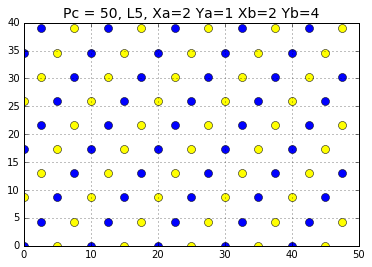

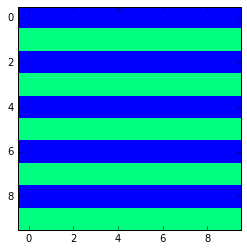

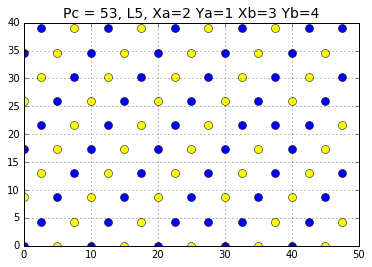

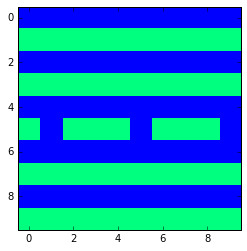

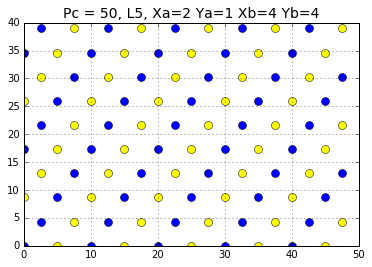

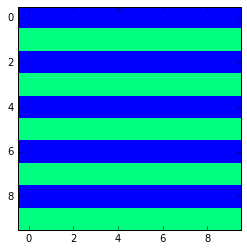

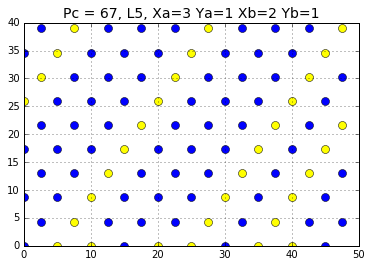

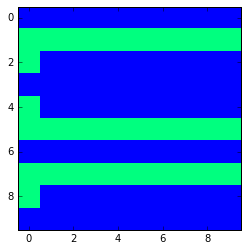

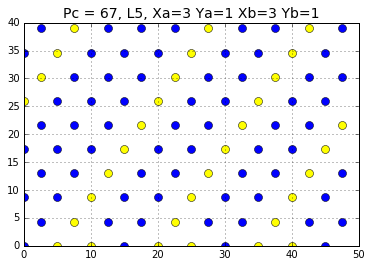

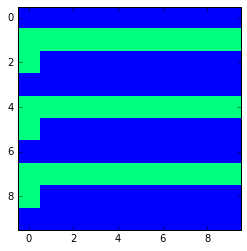

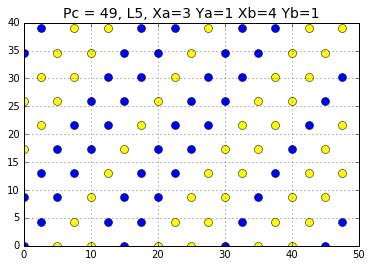

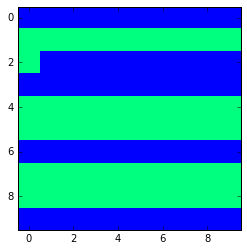

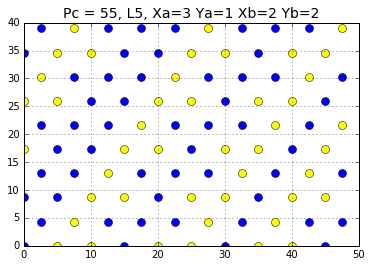

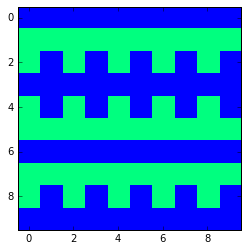

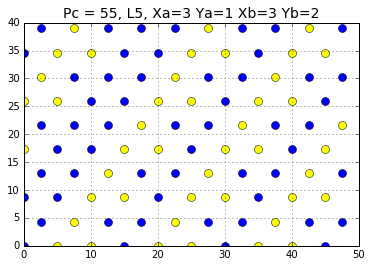

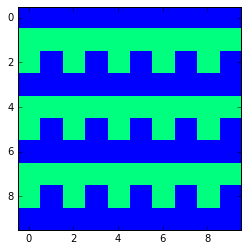

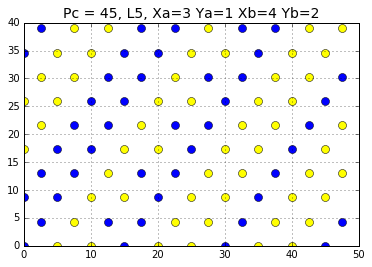

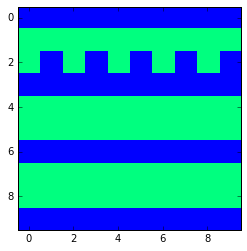

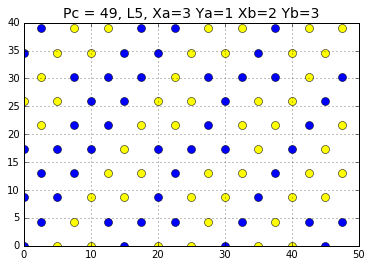

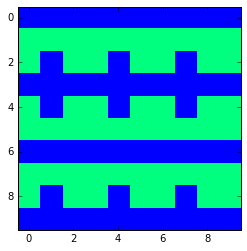

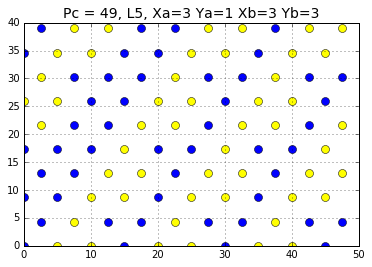

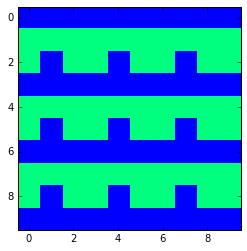

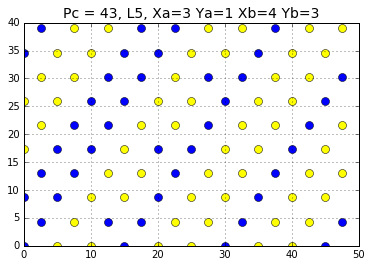

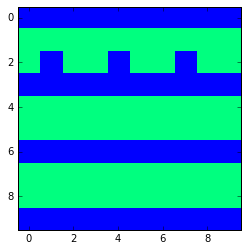

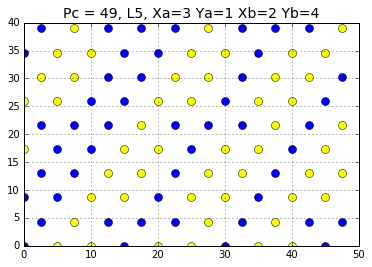

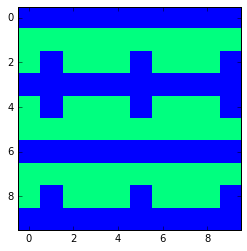

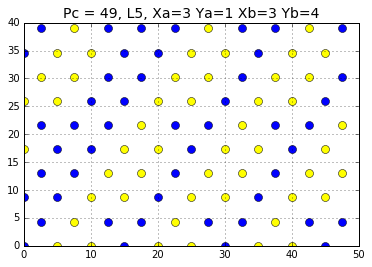

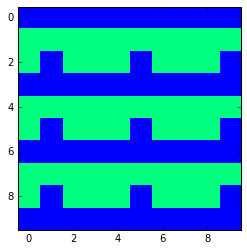

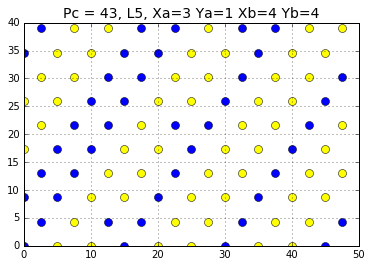

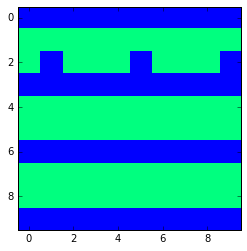

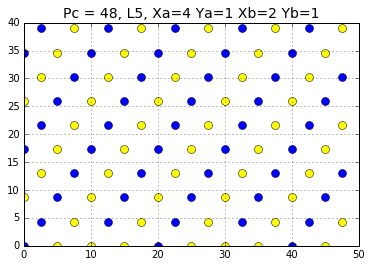

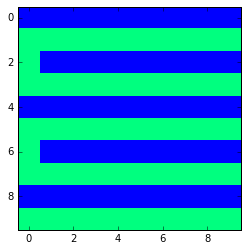

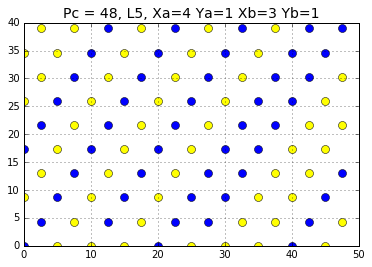

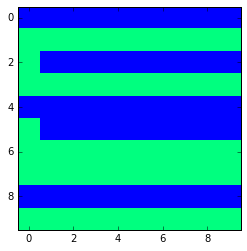

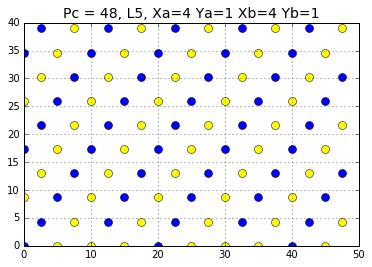

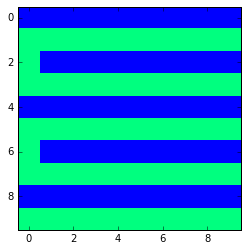

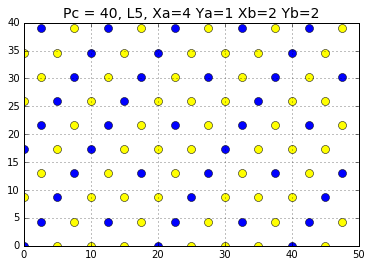

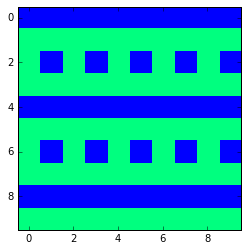

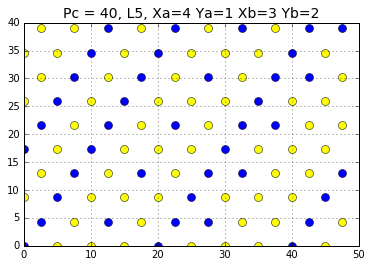

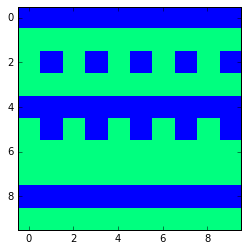

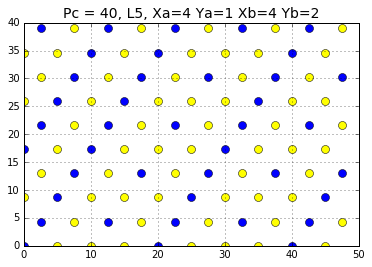

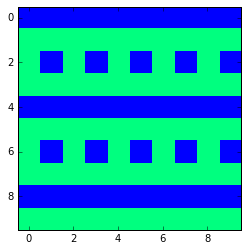

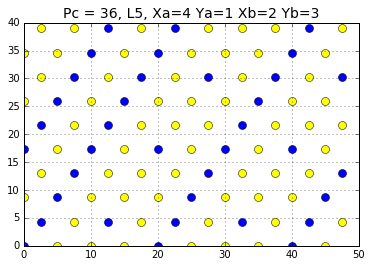

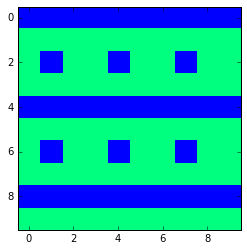

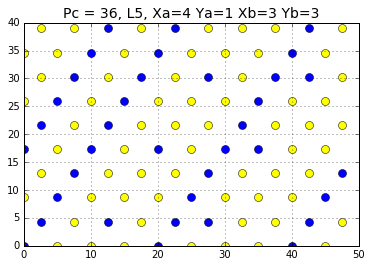

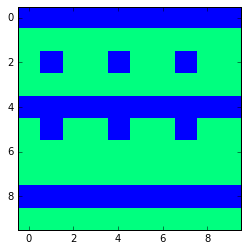

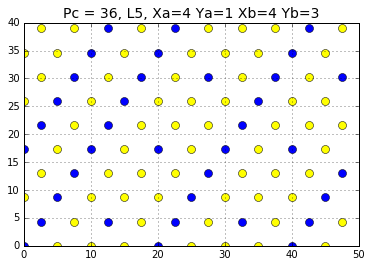

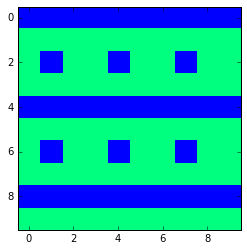

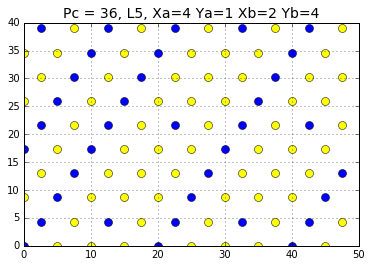

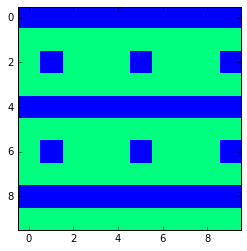

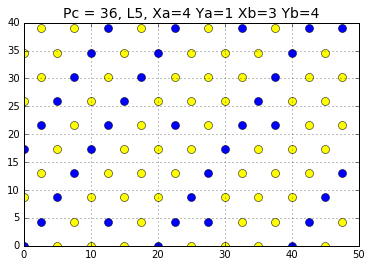

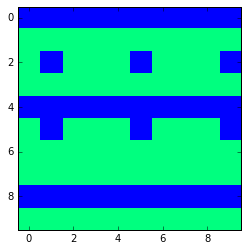

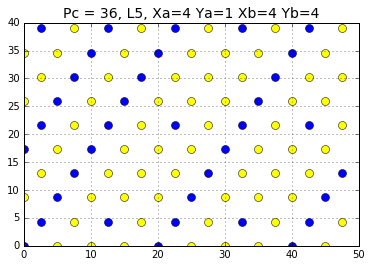

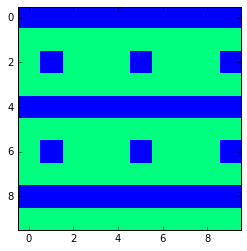

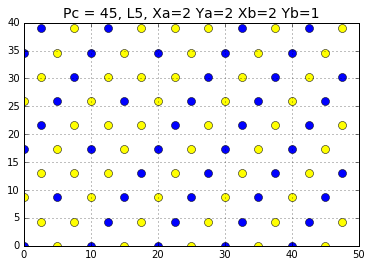

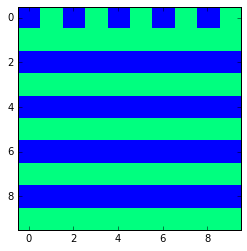

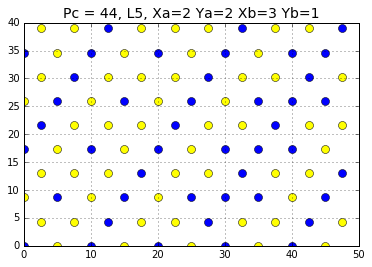

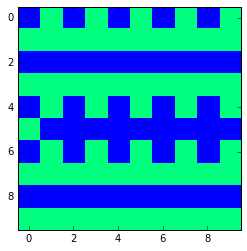

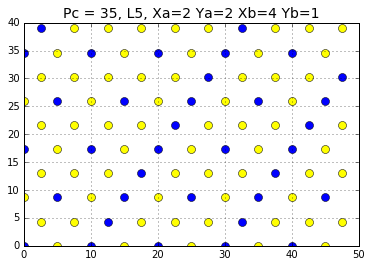

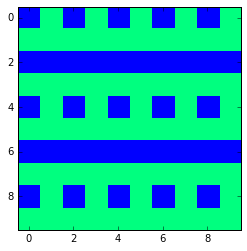

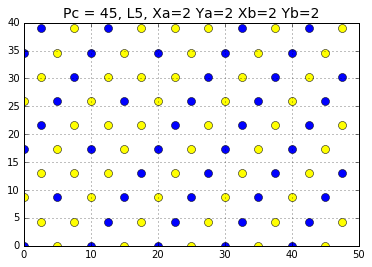

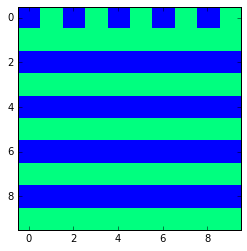

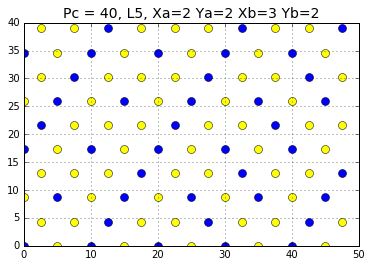

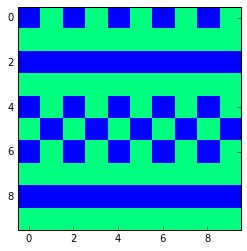

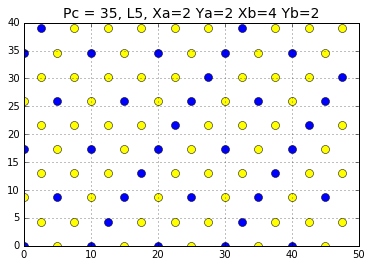

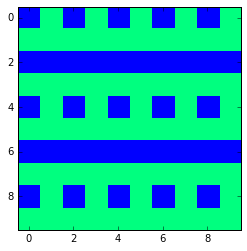

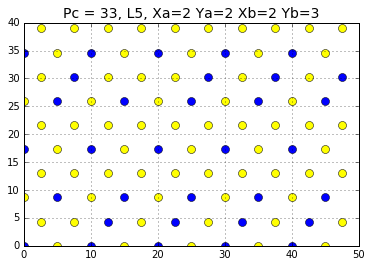

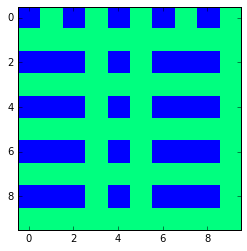

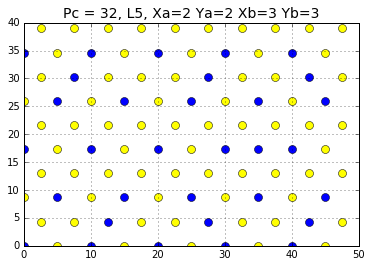

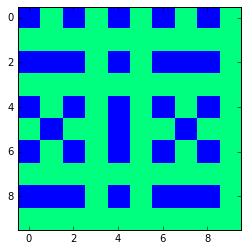

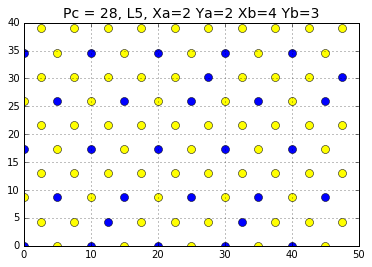

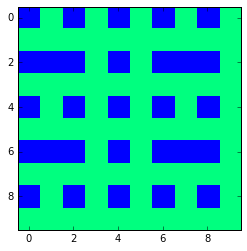

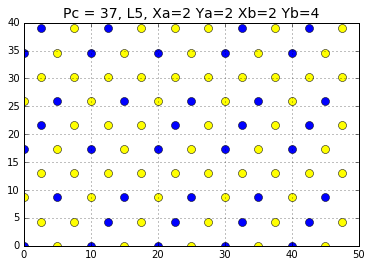

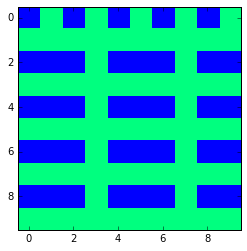

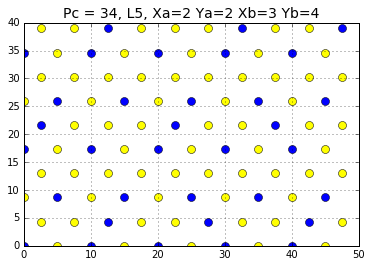

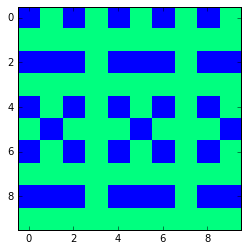

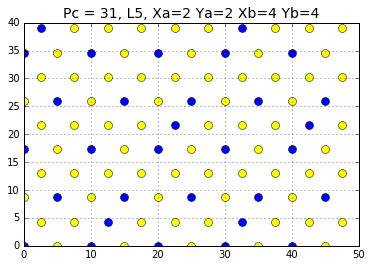

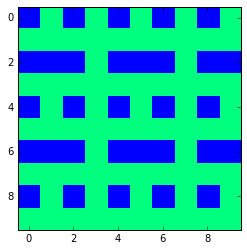

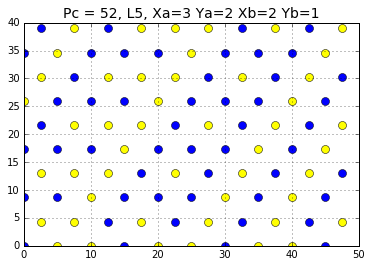

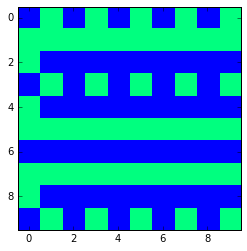

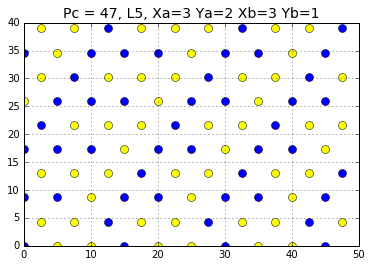

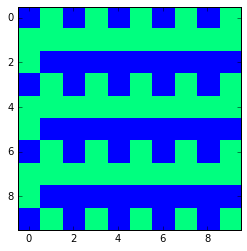

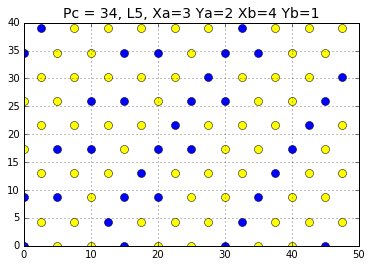

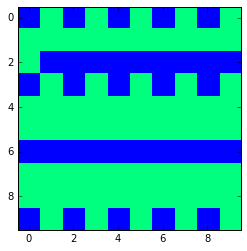

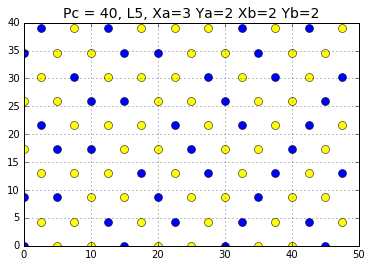

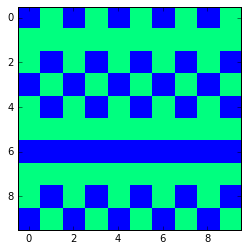

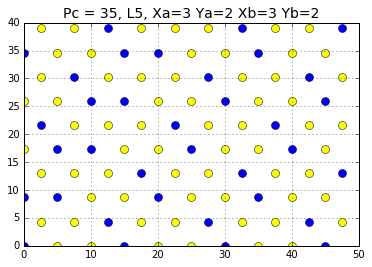

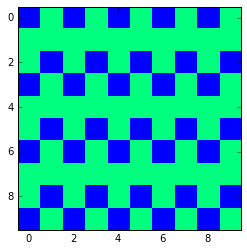

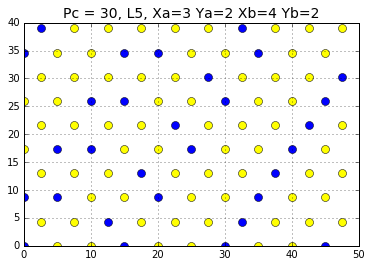

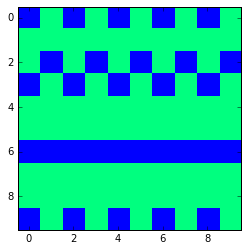

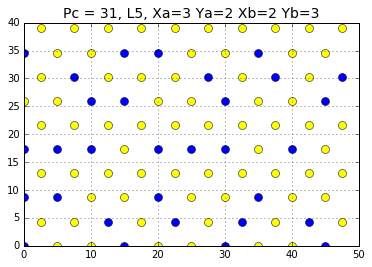

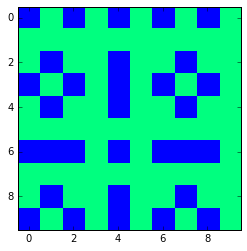

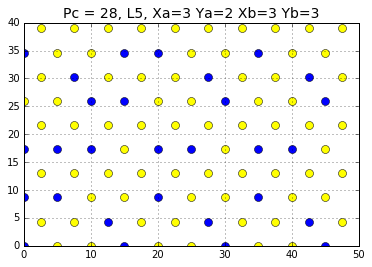

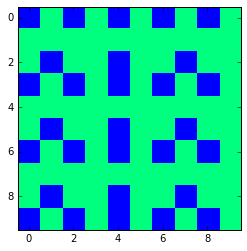

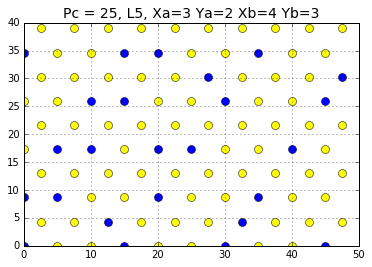

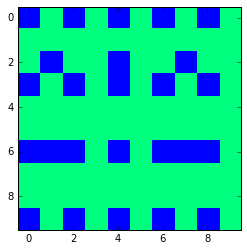

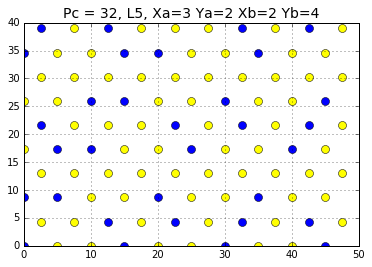

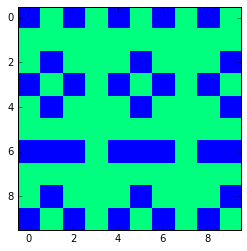

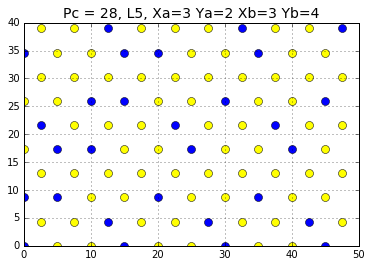

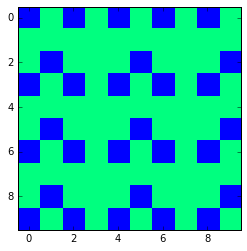

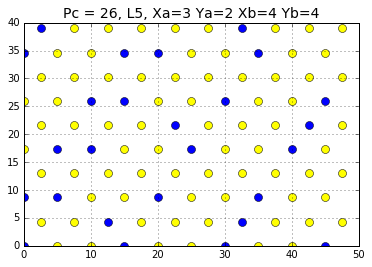

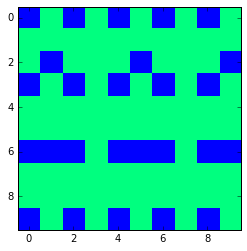

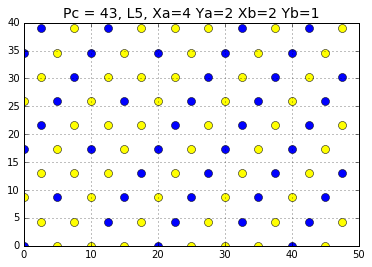

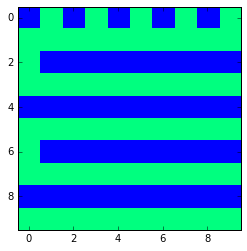

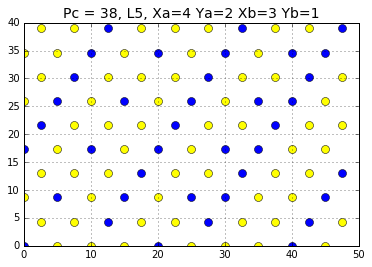

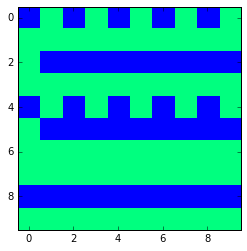

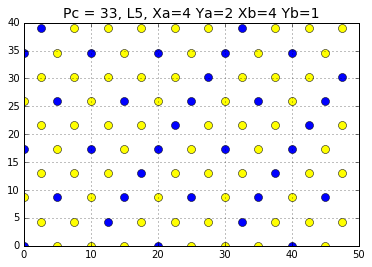

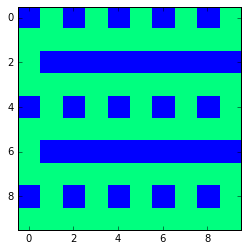

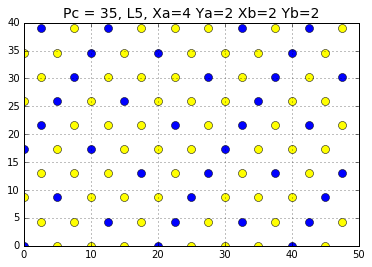

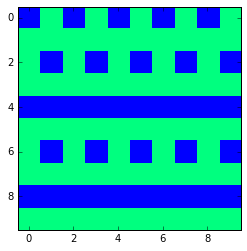

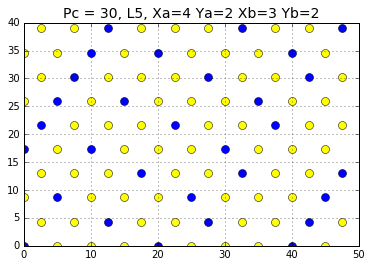

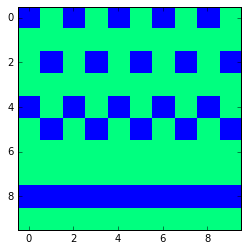

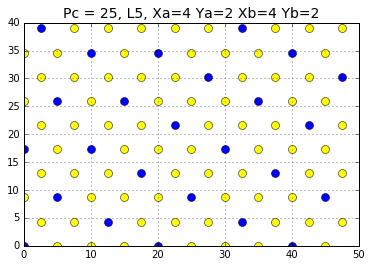

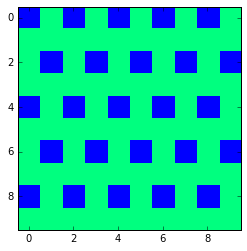

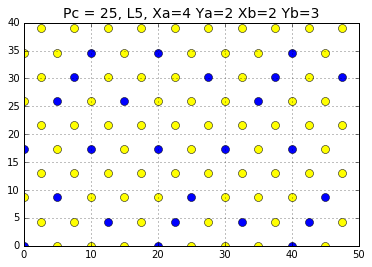

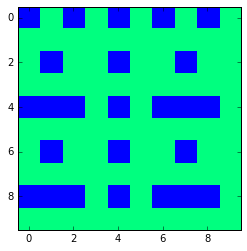

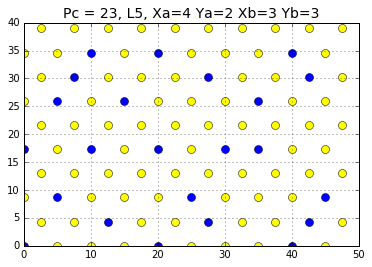

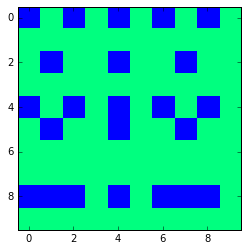

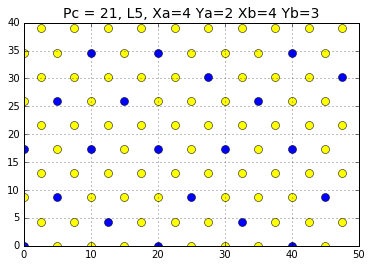

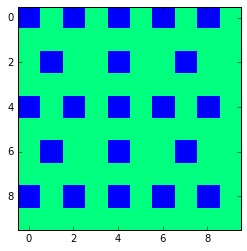

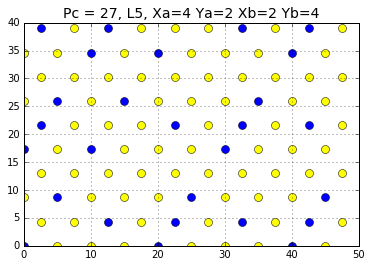

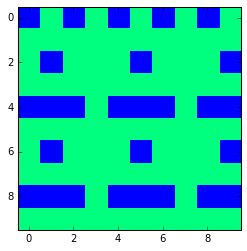

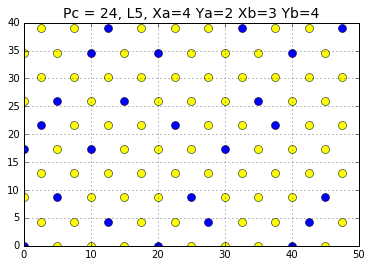

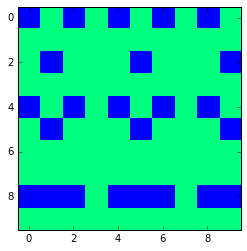

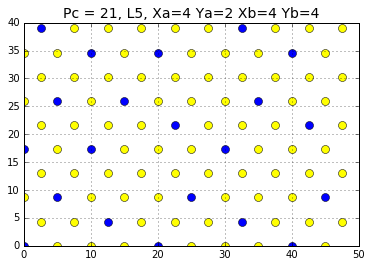

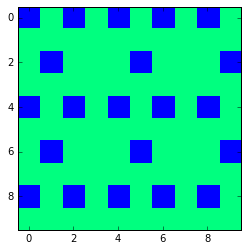

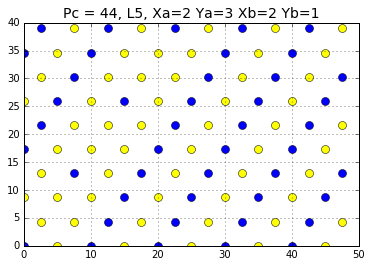

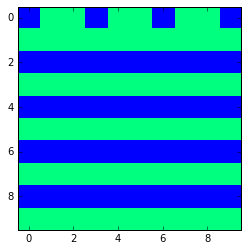

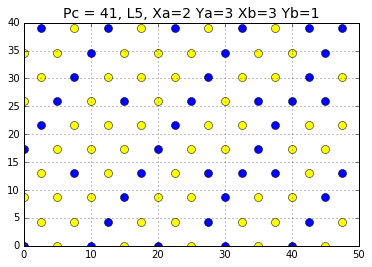

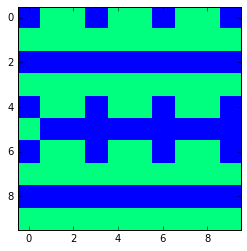

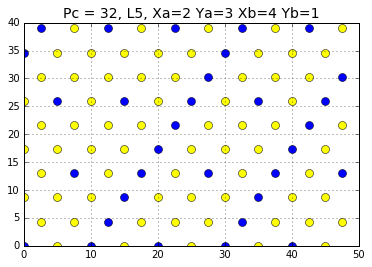

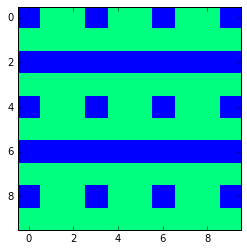

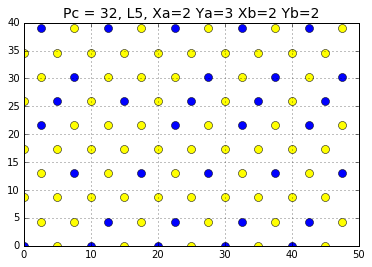

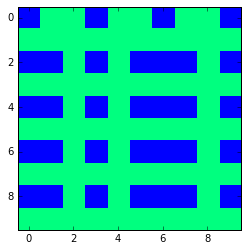

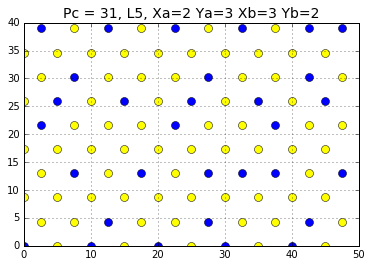

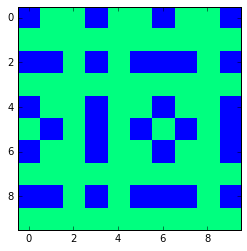

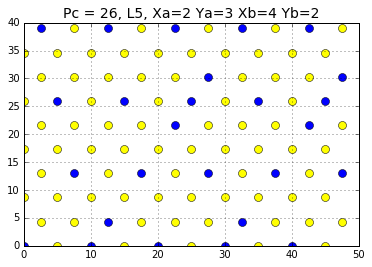

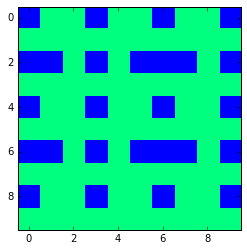

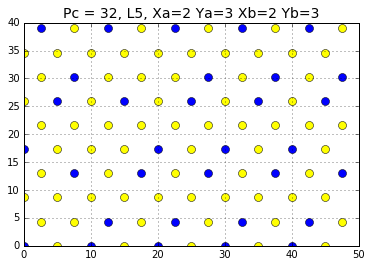

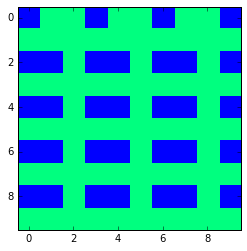

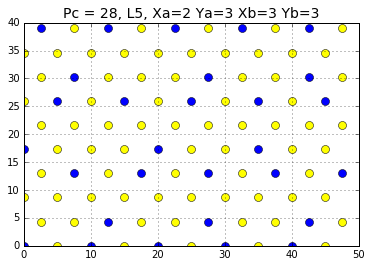

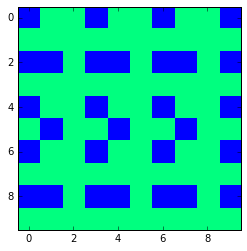

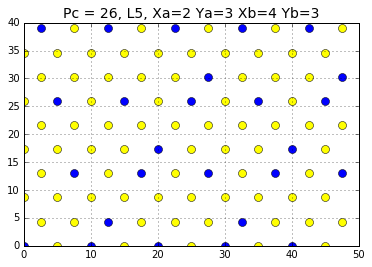

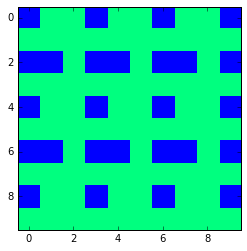

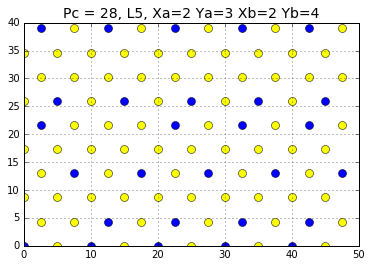

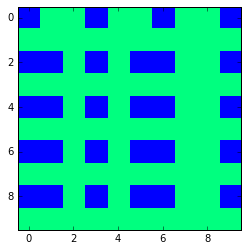

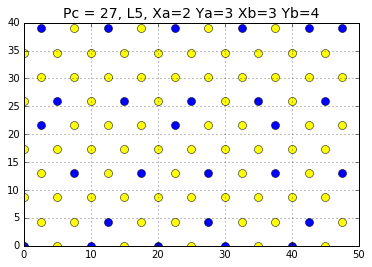

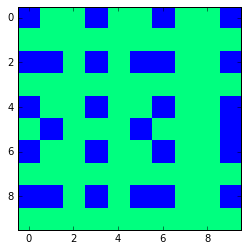

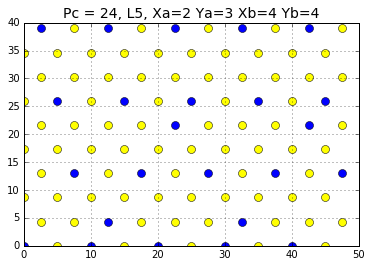

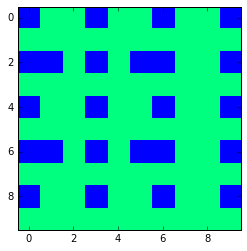

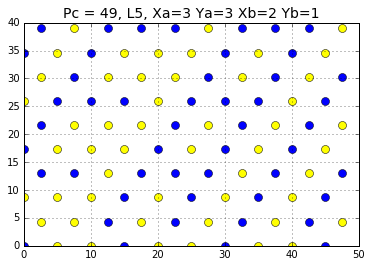

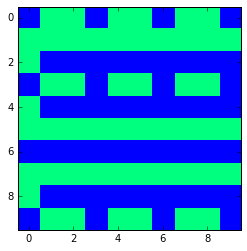

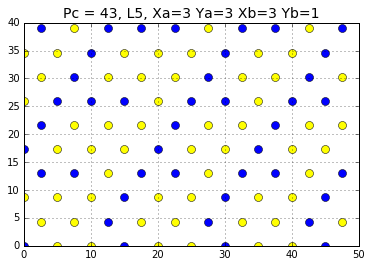

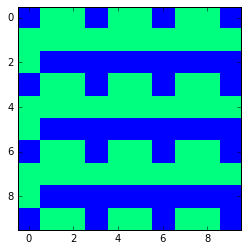

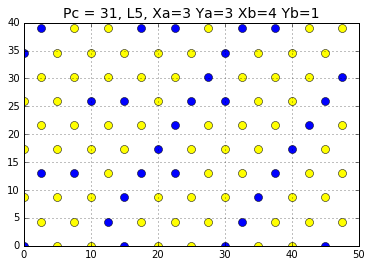

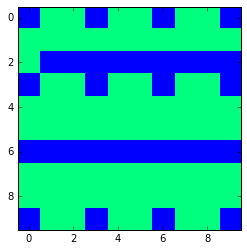

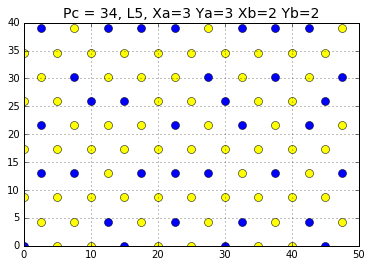

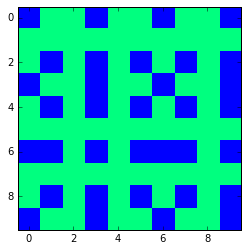

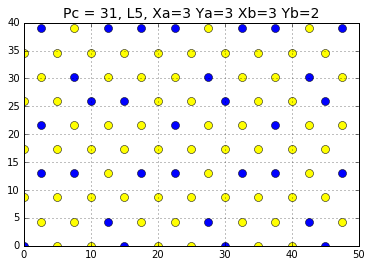

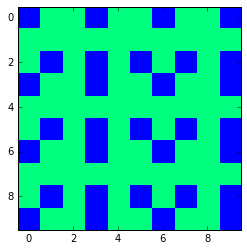

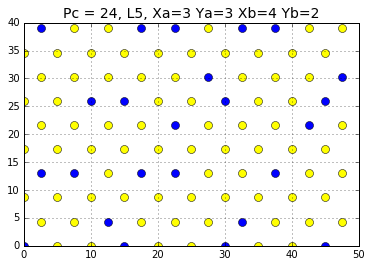

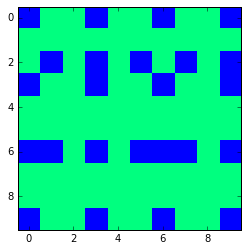

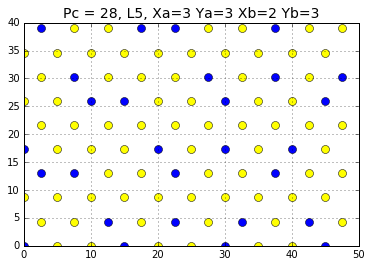

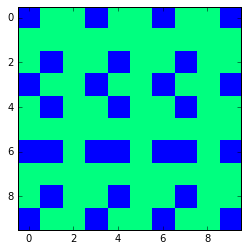

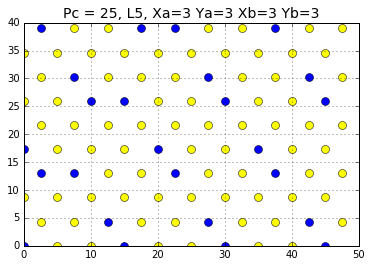

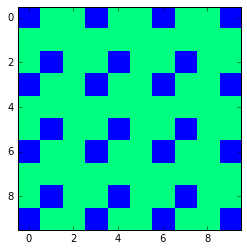

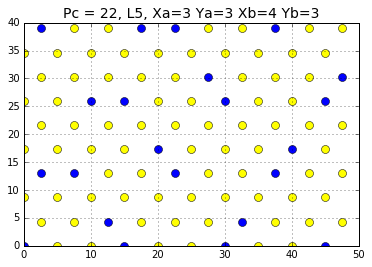

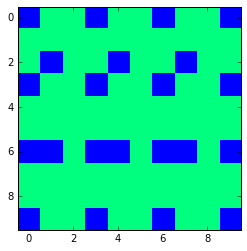

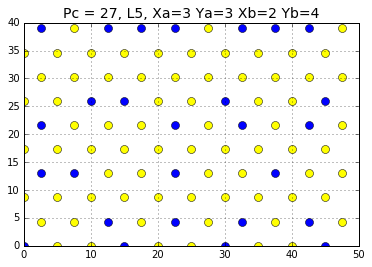

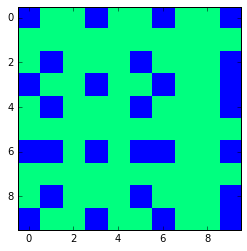

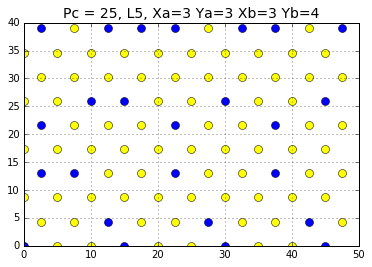

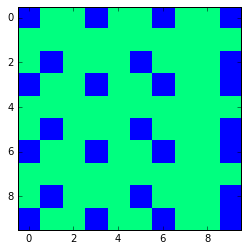

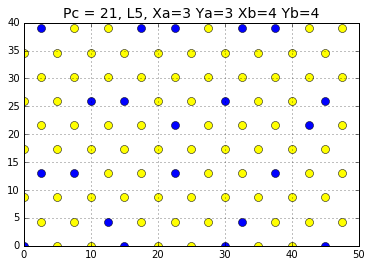

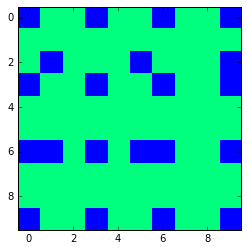

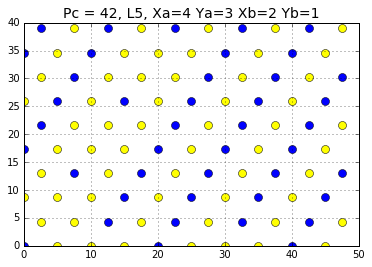

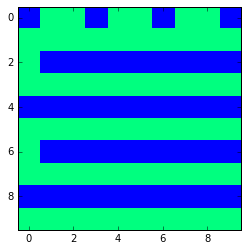

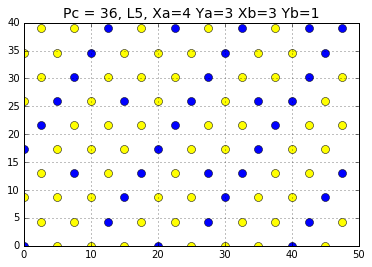

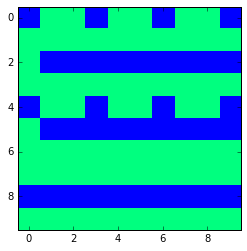

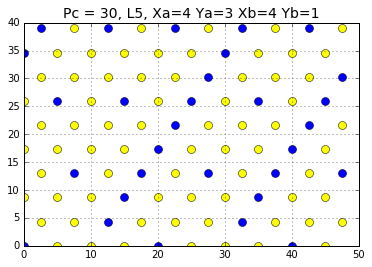

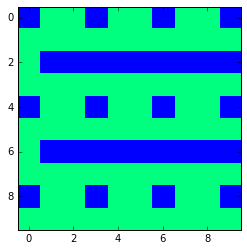

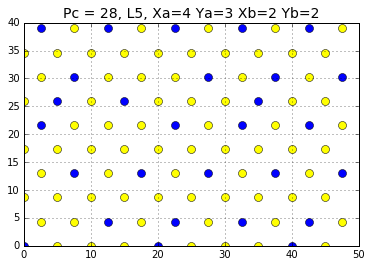

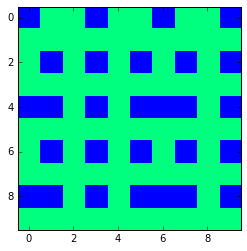

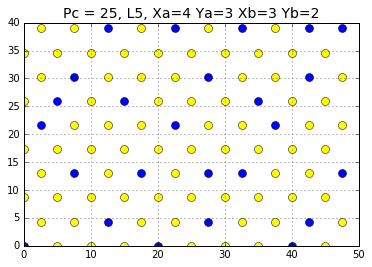

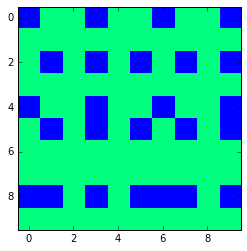

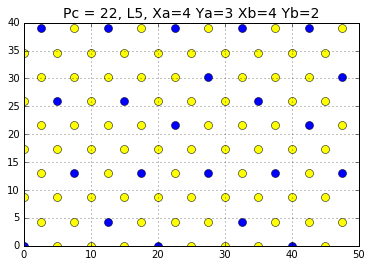

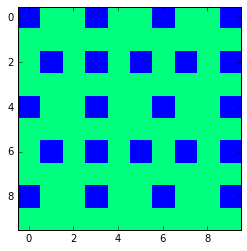

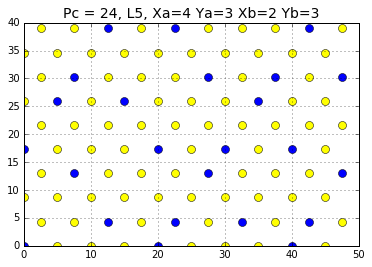

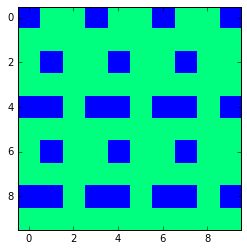

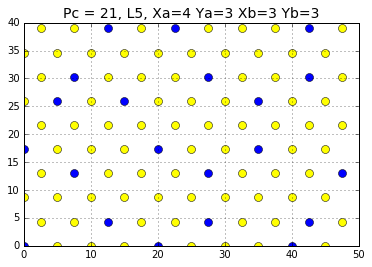

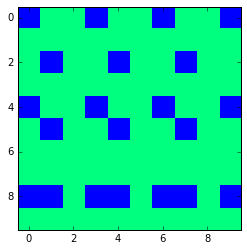

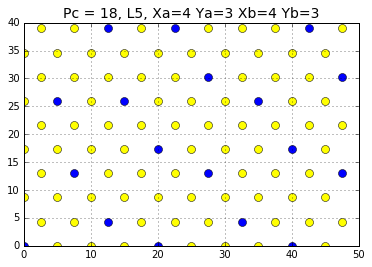

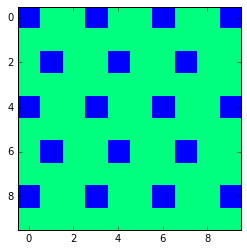

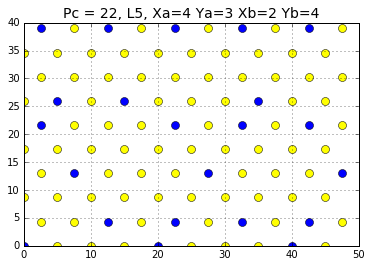

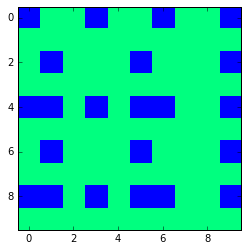

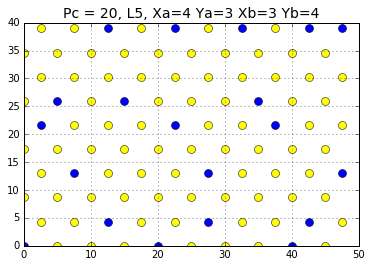

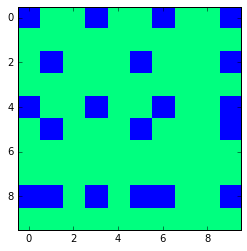

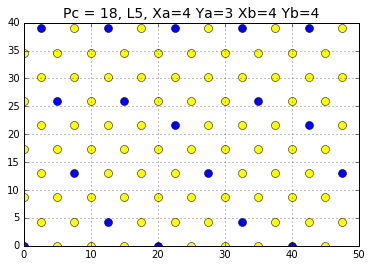

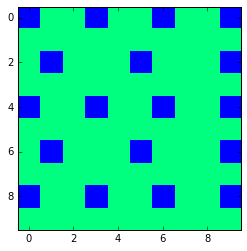

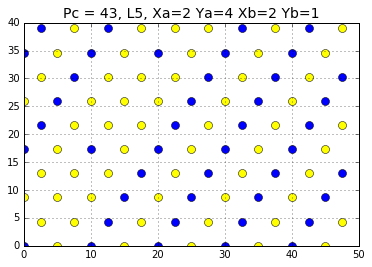

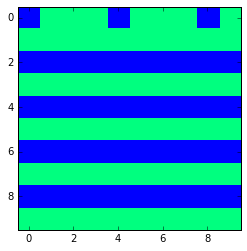

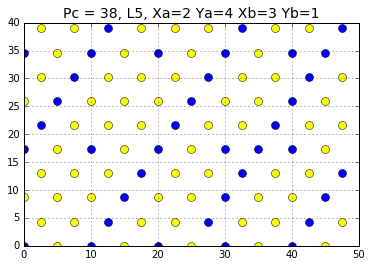

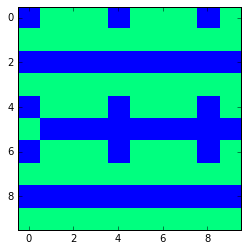

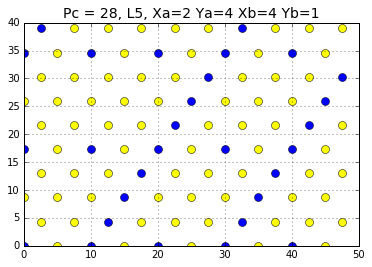

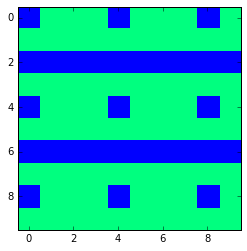

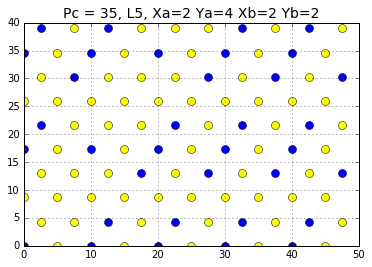

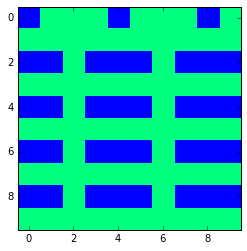

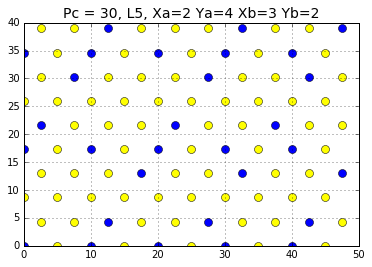

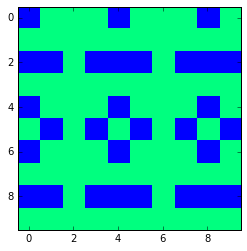

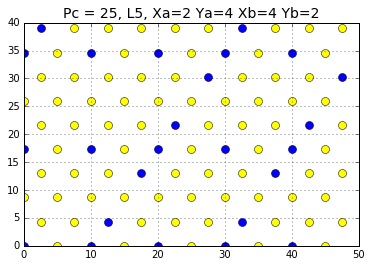

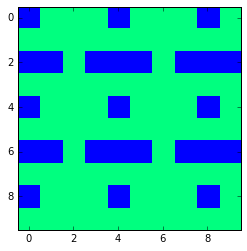

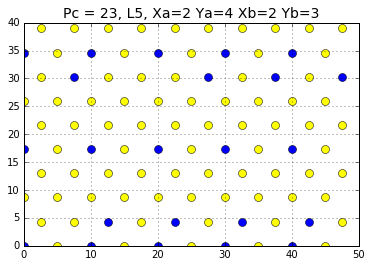

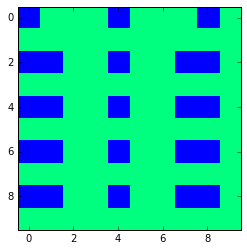

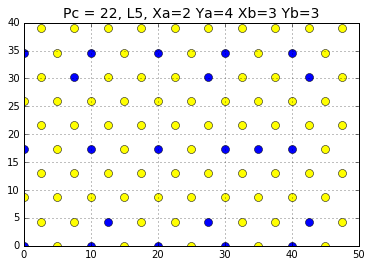

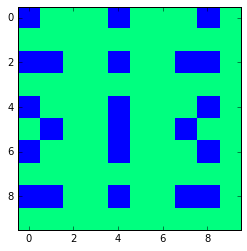

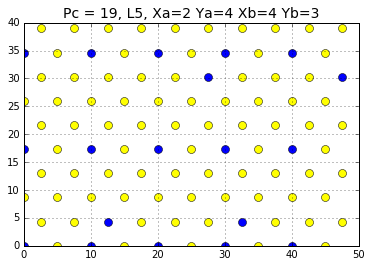

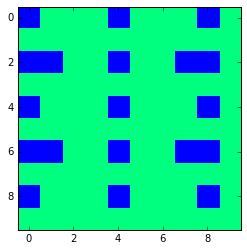

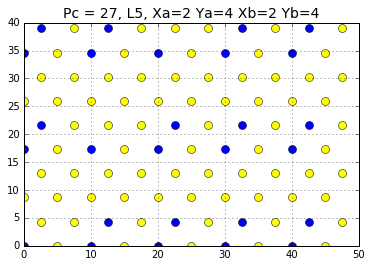

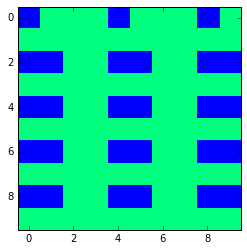

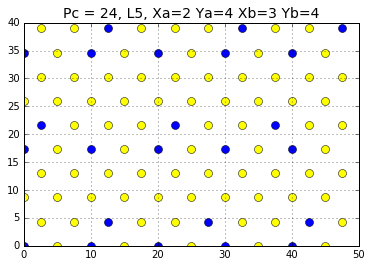

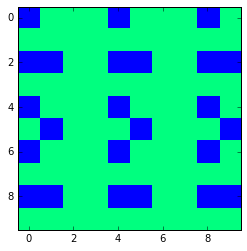

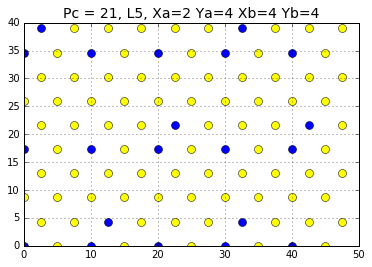

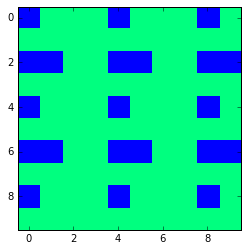

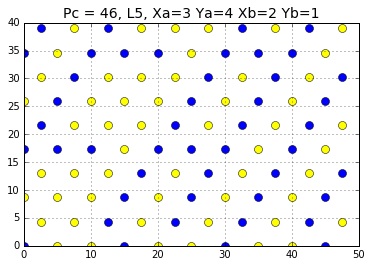

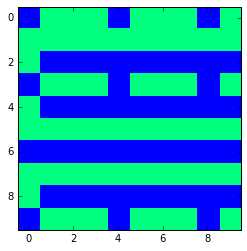

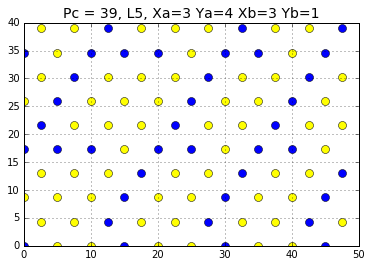

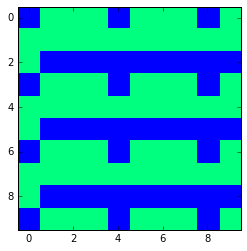

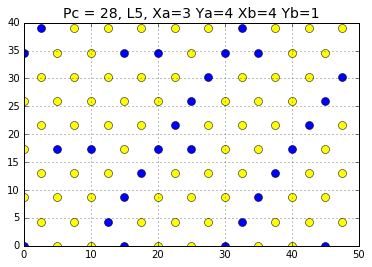

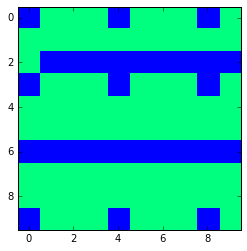

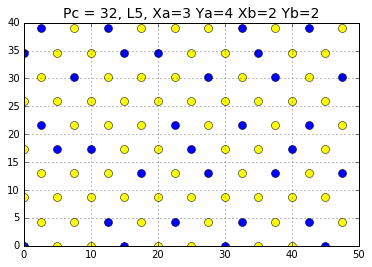

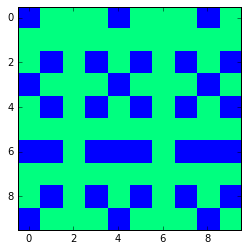

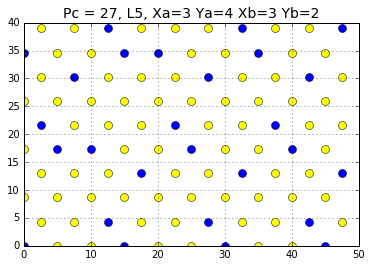

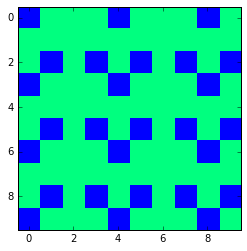

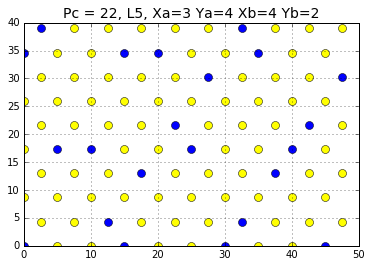

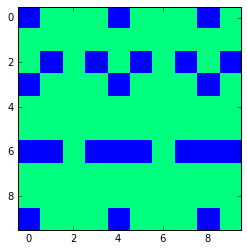

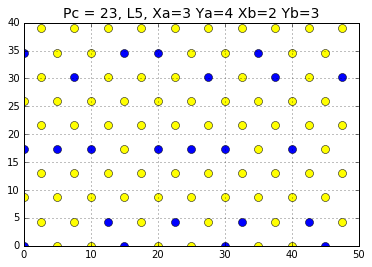

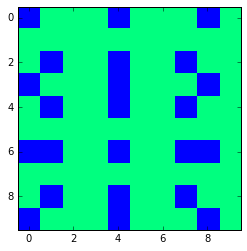

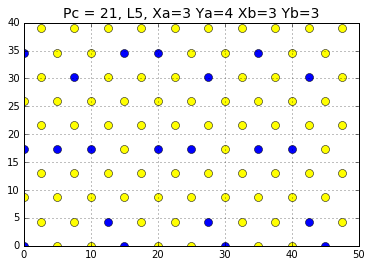

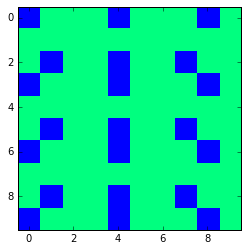

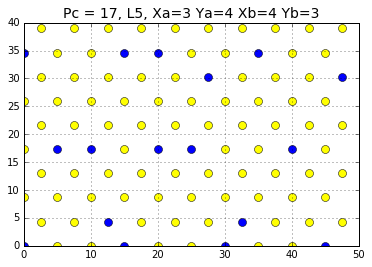

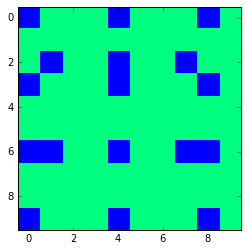

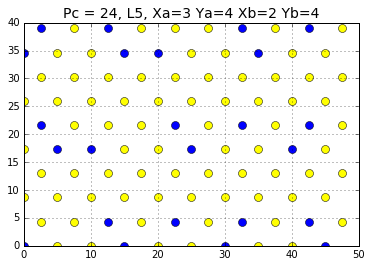

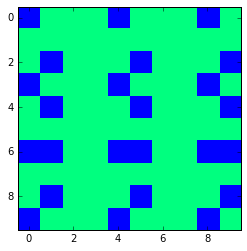

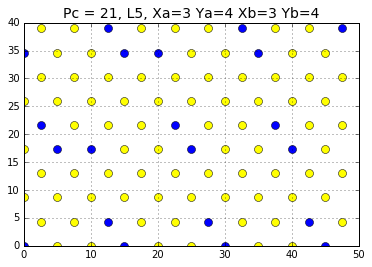

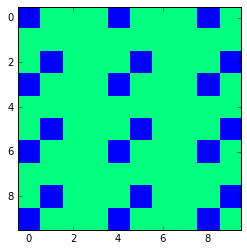

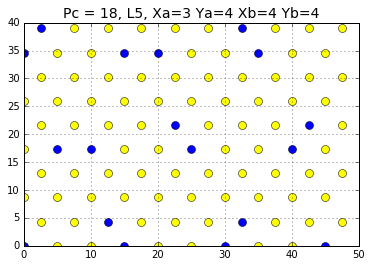

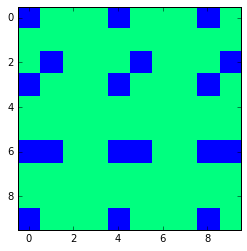

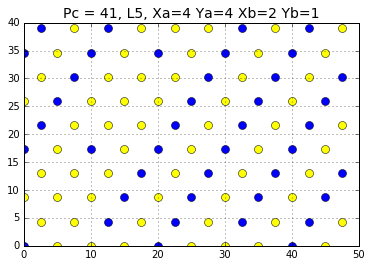

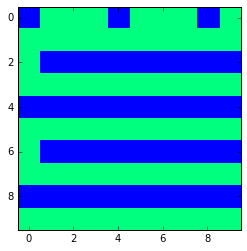

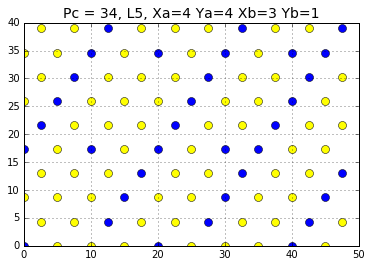

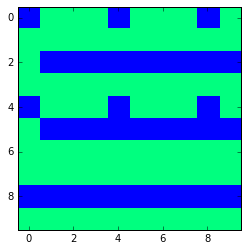

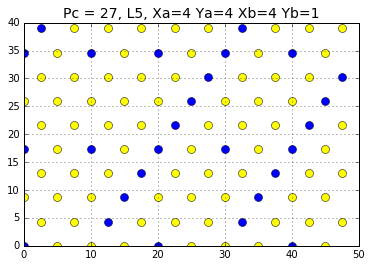

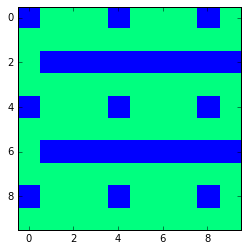

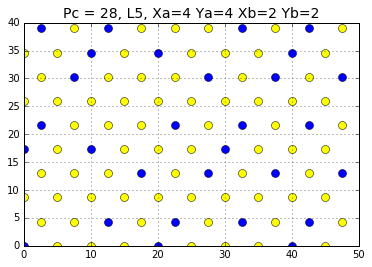

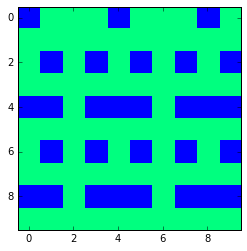

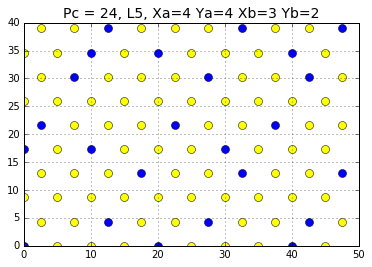

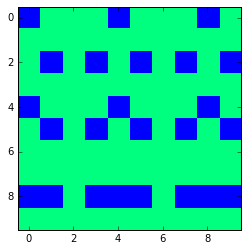

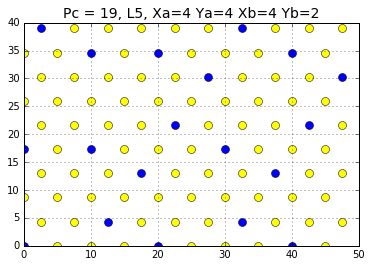

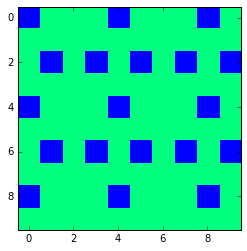

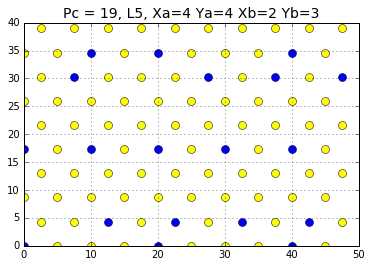

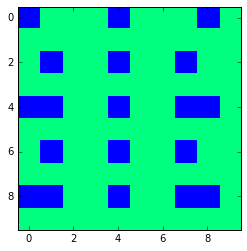

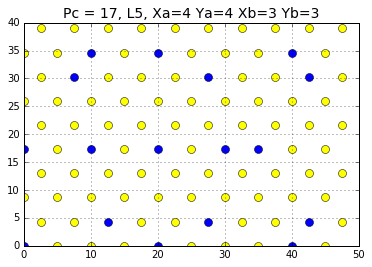

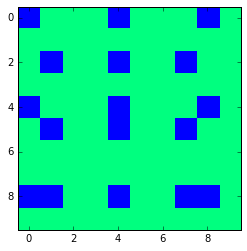

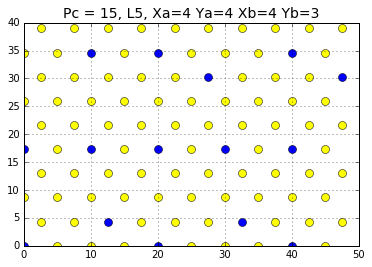

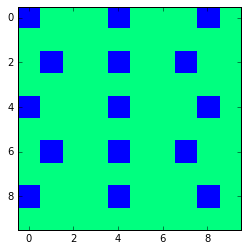

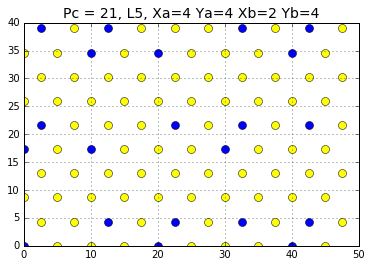

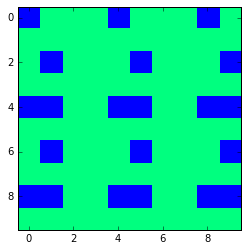

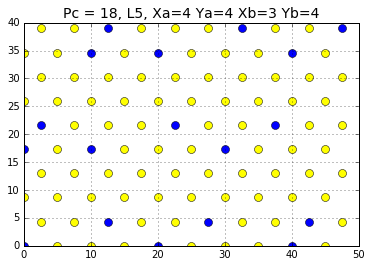

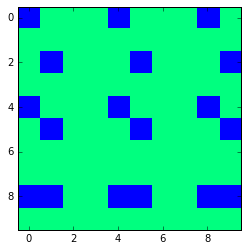

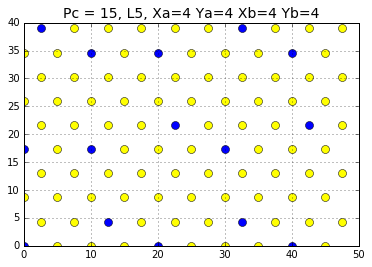

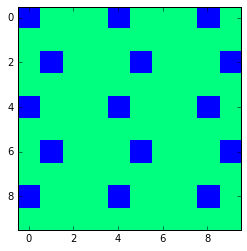

In [16]:
loop = 'loop5'
for yintervalA in range(1,5):
    for xintervalA in range(2,5):
        for yintervalB in range(1,5):
            for xintervalB in range(2,5):
                pType, pc = loop5(xintervalA,yintervalA,xintervalB,yintervalB, Nx, Ny)
                mytext = ', L5, Xa='+ str(xintervalA)+' Ya='+str(yintervalA)+' Xb='+ str(xintervalB)+' Yb='+str(yintervalB)
                plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
                plotheat(pType, pc, Nx, Ny, loop)

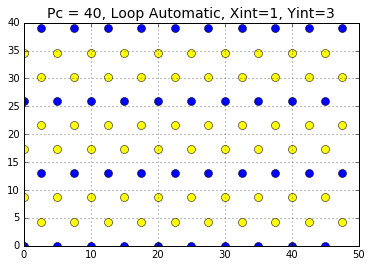

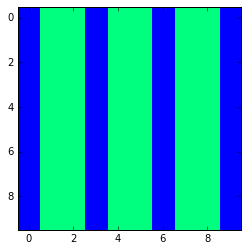

In [17]:
######################## Automactic Distance ###############################
loop = 'Autom'

Nxoxy = 6 # number of oxygens in x-direction 
Nyoxy = 3 # number of oxygens in y-direction 

# exchange particles (oxygens for carbons)
#    Get indices of particles to replace:
xincrement = Nx/Nxoxy
yincrement = Ny/Nyoxy

n_oxys =0
pType = pdb.C_restart(Nx,Ny)
for k in range(0,Nx,xincrement):
    for l in range(0,Ny,yincrement):
        if pType[k,l]=='C':
                pType[k,l] = 'O' 
                n_oxys = n_oxys + 1
pc = float(n_oxys)/float(Nx*Ny)
mytext = ', Loop Automatic, Xint='+ str(xincrement)+', Yint='+str(yincrement)
plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
plotheat(pType, pc, Nx, Ny, loop)

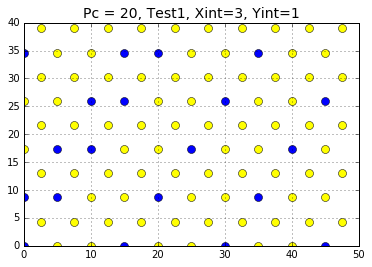

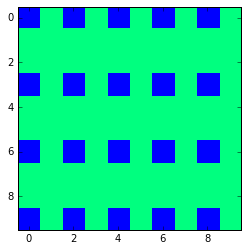

In [18]:
# Test 1 (looking for 40%)
loop = 'Test1'

Nx = 10 # number of gridpoints in x-direction (carbons)
Ny = 10 # number of gridpoints in y-direction (carbons)

pc=20 #Good!
xinterval = 3
yinterval = 1         

pType = pdb.C_restart(Nx,Ny)
n_oxys =0
for l in range(0,Ny-1,yinterval):
    for k in range(0,Nx,xinterval):
        if pType[k,l+l%2]=='C':
            pType[k,l+l%2] = 'O' 
            n_oxys = n_oxys + 1
pc = float(n_oxys)/float(Nx*Ny)
mytext = ', Test1, Xint='+ str(xinterval)+', Yint='+str(yinterval)
plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
plotheat(pType, pc, Nx, Ny, loop)

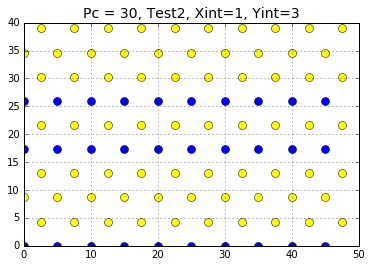

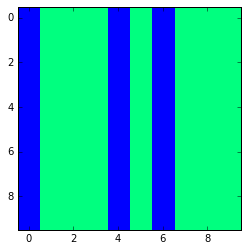

In [19]:
# Test 2 (looking for 40%)
loop = 'Test2'

Nx = 10 # number of gridpoints in x-direction (carbons)
Ny = 10 # number of gridpoints in y-direction (carbons)

pc=25 #Good!
xinterval = 2
yinterval = 1

pc=25 #Good!
xinterval = 2
yinterval = 2

pc=50 #Bad!
xinterval = 1
yinterval = 2

pc=30 #Bad!
xinterval = 1
yinterval = 3

pType = pdb.C_restart(Nx,Ny)
n_oxys =0
for l in range(0,Ny-1,yinterval):
    for k in range(0,Nx,xinterval):
        if pType[k,l+l%2]=='C':
            pType[k,l+l%2] = 'O' 
            n_oxys = n_oxys + 1
pc = float(n_oxys)/float(Nx*Ny)
mytext = ', Test2, Xint='+ str(xinterval)+', Yint='+str(yinterval)
plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
plotheat(pType, pc, Nx, Ny, loop)

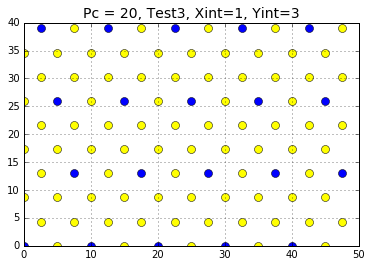

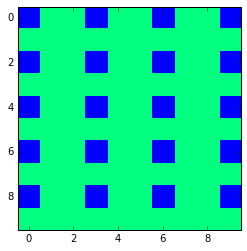

In [20]:
# Test 3 (looking for 40%)
loop = 'Test3'

Nx = 10 # number of gridpoints in x-direction (carbons)
Ny = 10 # number of gridpoints in y-direction (carbons)

pc=0
xinterval = 2
yinterval = 1

pc=0
xinterval = 2
yinterval = 2

pc=0
xinterval = 1
yinterval = 2

pc=20 #Good!
xinterval = 1
yinterval = 3

pType = pdb.C_restart(Nx,Ny)
n_oxys =0
for l in range(0,Ny,yinterval):
    for k in range(0,Nx-1,xinterval):
        if pType[k+k%2,l]=='C':
            pType[k+k%2,l] = 'O' 
            n_oxys = n_oxys + 1
pc = float(n_oxys)/float(Nx*Ny)
mytext = ', Test3, Xint='+ str(xinterval)+', Yint='+str(yinterval)
plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
plotheat(pType, pc, Nx, Ny, loop)

[['C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C']
 ['O' 'O' 'C' 'O' 'O' 'O' 'C' 'O' 'O' 'C']
 ['C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C']
 ['O' 'O' 'C' 'O' 'O' 'O' 'C' 'O' 'O' 'C']
 ['C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C']
 ['O' 'O' 'C' 'O' 'O' 'O' 'C' 'O' 'O' 'C']
 ['C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C']
 ['O' 'O' 'C' 'O' 'O' 'O' 'C' 'O' 'O' 'C']
 ['C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C']
 ['O' 'O' 'C' 'O' 'O' 'O' 'C' 'O' 'O' 'C']]


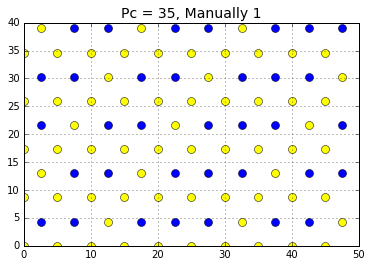

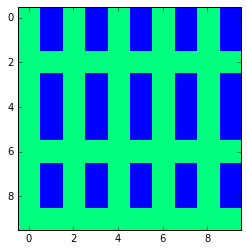

In [21]:
########################### Manually (looking for 40^=%) #############################################
loop = 'manual1'

pType = pdb.C_restart(Nx,Ny)
n_oxys =0
for i in range(Ny/2):
    #pType[1,i*2] = 'O'
    #n_oxys = n_oxys + 1
    #pType[2,i*2] = 'O'
    #n_oxys = n_oxys + 1
    #pType[4,i*2] = 'O'
    #n_oxys = n_oxys + 1
    #pType[6,i*2] = 'O'
    #n_oxys = n_oxys + 1
    #pType[7,i*2] = 'O'
    #n_oxys = n_oxys + 1
    pType[0,(i*2)+1] = 'O'
    n_oxys = n_oxys + 1
    pType[1,(i*2)+1] = 'O'
    n_oxys = n_oxys + 1
    pType[3,(i*2)+1] = 'O'
    n_oxys = n_oxys + 1
    pType[4,(i*2)+1] = 'O'
    n_oxys = n_oxys + 1
    pType[5,(i*2)+1] = 'O'
    n_oxys = n_oxys + 1
    pType[7,(i*2)+1] = 'O'
    n_oxys = n_oxys + 1
    pType[8,(i*2)+1] = 'O'
    n_oxys = n_oxys + 1
pc = float(n_oxys)/float(Nx*Ny)
mytext = ', Manually 1'
print pType.T
plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
plotheat(pType, pc, Nx, Ny, loop)

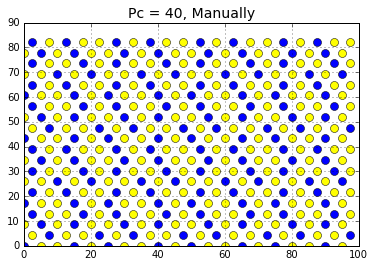

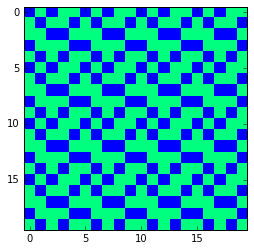

In [22]:
########################### Manually (looking for 40^=%) #############################################
loop = 'manual2'

Nx = 20
Ny = 20

# Loop for 20 x 20 grid
pType = pdb.C_restart(Nx,Ny)
n_oxys =0
for j in range(Ny):
    if (j == 0) or (j == 5) or (j == 10) or (j == 15):
        for i in [0,3,5,8,10,13,15,18]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
    if (j == 1) or (j == 6) or (j == 11) or (j == 16):
        for i in [1,4,6,9,11,14,16,19]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
    if (j == 2) or (j == 7) or (j == 12) or (j == 17):
        for i in [0,2,5,7,10,12,15,17]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
    if (j == 3) or (j == 8) or (j == 13) or (j == 18):
        for i in [2,4,7,9,12,14,17,19]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
    if (j == 4) or (j == 9) or (j == 14) or (j == 19):
        for i in [1,3,6,8,11,13,16,18]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
"""
Nx = 10
Ny = 10

# This is the same but without the loop (for 10x10 grid)
pType = pdb.C_restart(Nx,Ny)
n_oxys =0
pType[0,0] = 'O'
pType[3,0] = 'O'
pType[5,0] = 'O'
pType[8,0] = 'O'
n_oxys = n_oxys + 4
pType[1,1] = 'O'
pType[4,1] = 'O'
pType[6,1] = 'O'
pType[9,1] = 'O'
n_oxys = n_oxys + 4
pType[2,2] = 'O'
pType[4,2] = 'O'
pType[7,2] = 'O'
pType[9,2] = 'O'
n_oxys = n_oxys + 4
pType[0,3] = 'O'
pType[2,3] = 'O'
pType[5,3] = 'O'
pType[7,3] = 'O'
n_oxys = n_oxys + 4
pType[1,4] = 'O'
pType[3,4] = 'O'
pType[6,4] = 'O'
pType[8,4] = 'O'
n_oxys = n_oxys + 4
pType[0,5] = 'O'
pType[3,5] = 'O'
pType[5,5] = 'O'
pType[8,5] = 'O'
n_oxys = n_oxys + 4
pType[1,6] = 'O'
pType[4,6] = 'O'
pType[6,6] = 'O'
pType[9,6] = 'O'
n_oxys = n_oxys + 4
pType[2,7] = 'O'
pType[4,7] = 'O'
pType[7,7] = 'O'
pType[9,7] = 'O'
n_oxys = n_oxys + 4
pType[0,8] = 'O'
pType[2,8] = 'O'
pType[5,8] = 'O'
pType[7,8] = 'O'
n_oxys = n_oxys + 4
pType[1,9] = 'O'
pType[3,9] = 'O'
pType[6,9] = 'O'
pType[8,9] = 'O'
n_oxys = n_oxys + 4
""" 
pc = float(n_oxys)/float(Nx*Ny)
mytext = ', Manually'
#print pType.T
plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
plotheat(pType, pc, Nx, Ny, loop)

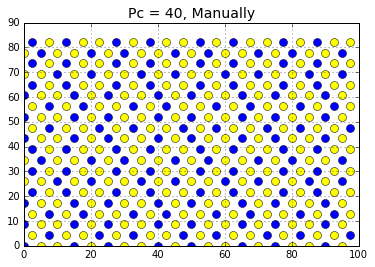

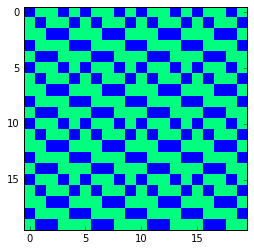

In [23]:
########################### Manually (looking for 40^=%) #############################################
loop = 'manual3' # same grid ordered differently


Nx = 20
Ny = 20

# Loop for 20 x 20 grid
pType = pdb.C_restart(Nx,Ny)
n_oxys =0
for j in range(Ny):
    if (j == 0) or (j == 5) or (j == 10) or (j == 15):
        for i in [0,3,5,8,10,13,15,18]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
    if (j == 1) or (j == 6) or (j == 11) or (j == 16):
        for i in [1,4,6,9,11,14,16,19]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
    if (j == 2) or (j == 7) or (j == 12) or (j == 17):
        for i in [2,4,7,9,12,14,17,19]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
    if (j == 3) or (j == 8) or (j == 13) or (j == 18):
        for i in [0,2,5,7,10,12,15,17]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
    if (j == 4) or (j == 9) or (j == 14) or (j == 19):
        for i in [1,3,6,8,11,13,16,18]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
"""
Nx = 10
Ny = 10

# This is the same but without the loop (for 10x10 grid)
pType = pdb.C_restart(Nx,Ny)
n_oxys =0
pType[0,0] = 'O'
pType[3,0] = 'O'
pType[5,0] = 'O'
pType[8,0] = 'O'
n_oxys = n_oxys + 4
pType[2,1] = 'O'
pType[4,1] = 'O'
pType[7,1] = 'O'
pType[9,1] = 'O'
n_oxys = n_oxys + 4
pType[1,2] = 'O'
pType[4,2] = 'O'
pType[6,2] = 'O'
pType[9,2] = 'O'
n_oxys = n_oxys + 4
pType[0,3] = 'O'
pType[2,3] = 'O'
pType[5,3] = 'O'
pType[7,3] = 'O'
n_oxys = n_oxys + 4
pType[1,4] = 'O'
pType[3,4] = 'O'
pType[6,4] = 'O'
pType[8,4] = 'O'
n_oxys = n_oxys + 4
pType[0,5] = 'O'
pType[3,5] = 'O'
pType[5,5] = 'O'
pType[8,5] = 'O'
n_oxys = n_oxys + 4
pType[1,6] = 'O'
pType[4,6] = 'O'
pType[6,6] = 'O'
pType[9,6] = 'O'
n_oxys = n_oxys + 4
pType[2,7] = 'O'
pType[4,7] = 'O'
pType[7,7] = 'O'
pType[9,7] = 'O'
n_oxys = n_oxys + 4
pType[0,8] = 'O'
pType[2,8] = 'O'
pType[5,8] = 'O'
pType[7,8] = 'O'
n_oxys = n_oxys + 4
pType[1,9] = 'O'
pType[3,9] = 'O'
pType[6,9] = 'O'
pType[8,9] = 'O'
n_oxys = n_oxys + 4
"""
pc = float(n_oxys)/float(Nx*Ny)
mytext = ', Manually'
#print pType.T
plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
plotheat(pType, pc, Nx, Ny, loop)

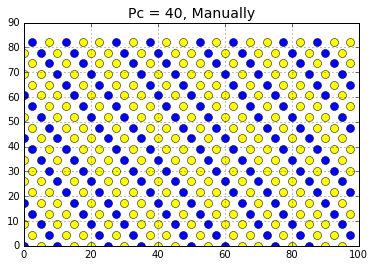

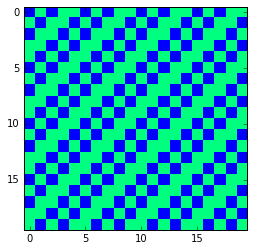

In [24]:
########################### Manually (looking for 40^=%) #############################################
loop = 'manual4' # same grid ordered differently


Nx = 20
Ny = 20

# Loop for 20 x 20 grid
pType = pdb.C_restart(Nx,Ny)
n_oxys =0
for j in range(Ny):
    if (j == 0) or (j == 5) or (j == 10) or (j == 15):
        for i in [0,2,5,7,10,12,15,17]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
    if (j == 1) or (j == 6) or (j == 11) or (j == 16):
        for i in [1,4,6,9,11,14,16,19]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
    if (j == 2) or (j == 7) or (j == 12) or (j == 17):
        for i in [0,3,5,8,10,13,15,18]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
    if (j == 3) or (j == 8) or (j == 13) or (j == 18):
        for i in [2,4,7,9,12,14,17,19]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
    if (j == 4) or (j == 9) or (j == 14) or (j == 19):
        for i in [1,3,6,8,11,13,16,18]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1

pc = float(n_oxys)/float(Nx*Ny)
mytext = ', Manually'
#print pType.T
plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
plotheat(pType, pc, Nx, Ny, loop)

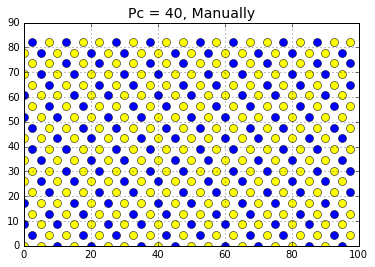

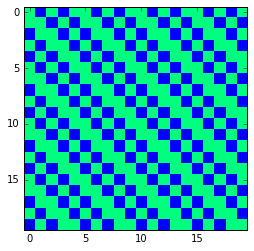

In [25]:
########################### Manually (looking for 40^=%) #############################################
loop = 'manual5' # same grid ordered differently


Nx = 20
Ny = 20

# Loop for 20 x 20 grid
pType = pdb.C_restart(Nx,Ny)
n_oxys =0
for j in range(Ny):
    if (j == 0) or (j == 5) or (j == 10) or (j == 15):
        for i in [2,4,7,9,12,14,17,19]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
    if (j == 1) or (j == 6) or (j == 11) or (j == 16):
        for i in [0,3,5,8,10,13,15,18]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
    if (j == 2) or (j == 7) or (j == 12) or (j == 17):
        for i in [1,4,6,9,11,14,16,19]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
    if (j == 3) or (j == 8) or (j == 13) or (j == 18):
        for i in [0,2,5,7,10,12,15,17]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1
    if (j == 4) or (j == 9) or (j == 14) or (j == 19):
        for i in [1,3,6,8,11,13,16,18]:
            pType[i,j] = 'O'
            n_oxys = n_oxys + 1

pc = float(n_oxys)/float(Nx*Ny)
mytext = ', Manually'
#print pType.T
plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
plotheat(pType, pc, Nx, Ny, loop)

In [26]:
"""
xPos, yPos = pdb.creategrid(a0, Nx, Ny)
pdb.writepdb(pType,xPos,yPos,zlast,pc,a0,Nx,Ny)
"""

'\nxPos, yPos = pdb.creategrid(a0, Nx, Ny)\npdb.writepdb(pType,xPos,yPos,zlast,pc,a0,Nx,Ny)\n'

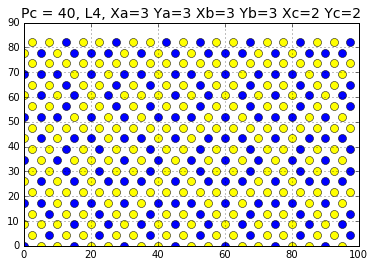

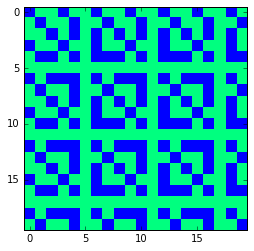

In [27]:
# Call loop4 with one "good" configuration

loop = 'loop4_single'

Nx = 20
Ny = 20

pc = 34 # Good!
xintervalA = 3
yintervalA = 3
xintervalB = 3
yintervalB = 3
xintervalC = 2
yintervalC = 2
                        
pType, pc = loop4(xintervalA,xintervalB,xintervalC,yintervalA,yintervalB,yintervalC,Nx, Ny)
mytext = ', L4, Xa='+ str(xintervalA)+' Ya='+str(yintervalA)+' Xb='+ str(xintervalB)+' Yb='+str(yintervalB)+' Xc='+ str(xintervalC)+' Yc='+str(yintervalC)
plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
plotheat(pType, pc, Nx, Ny, loop)

In [28]:
########################### TYPE 1 OF LOOP #############################################

pc = 8 # Good!
xinterval = 3
yinterval = 3

pc = 14 #(not evenly distributed)
xinterval = 3
yinterval = 1

pc = 10 #(not evenly distributed)
xinterval = 3
yinterval = 2

pc = 21 # Old SAM distribution
xinterval = 2
yinterval = 1

pc = 35 #(not evenly distributed)
xinterval = 1
yinterval = 2

pc=  13 #Good!
xinterval = 2
yinterval = 2

pc = 50 # not evenly distributed!
xinterval = 1
yinterval = 1

In [29]:
########################### TYPE 2 OF LOOP #############################################
        
pc = 20 #Good!
xinterval = 3
yinterval = 3

pc = 25 #Good!
xinterval = 3
yinterval = 2

pc = 15 #atoms distributed in lines
xinterval = 3
yinterval = 4

pc = 12 #(not evenly distributed)
xinterval = 4
yinterval = 4

pc = 50 #not evenly distributed!
xinterval = 2
yinterval = 2

pc = 100
xinterval = 2
yinterval = 1

pc = 50 #not evenly distributed!
xinterval = 3
yinterval = 1

pc = 50 #not evenly distributed!
xinterval = 2
yinterval = 3

In [30]:
########################### TYPE 3 OF LOOP (NEW) #######################################

pc = 20 #Good!
xinterval = 2
yinterval = 3

pc = 25 # Good!
xinterval = 2
yinterval = 2

pc = 40 # not evenly distributed!
xinterval = 3
yinterval = 1

pc = 30 # not evenly distributed!
xinterval = 4
yinterval = 1

pc = 20 # not evenly distributed!
xinterval = 3
yinterval = 2

pc = 16 # not evenly distributed!
xinterval = 3
yinterval = 3

pc = 15 # not evenly distributed!
xinterval = 4
yinterval = 2

In [31]:
########################### TYPE 4 OF LOOP (NEW++) #######################################

pc = 34 # Good!
xintervalA = 3
yintervalA = 3
xintervalB = 3
yintervalB = 3
xintervalC = 3
yintervalC = 3

In [32]:
########################### TYPE 5 OF LOOP ######################################
pc = 25 # Good!
xintervalA = 4
xintervalB = 4

yintervalB = 2
yintervalA = 2

pc = 35 # Good!
xintervalA = 3
xintervalB = 3

yintervalA = 2
yintervalB = 2

In [33]:
"""
########################### Print empty grid #############################################
Nx = 10
Ny = 10
loop = 'manual_'+ str(Nx) + 'x' +str(Ny)
pType = pdb.C_restart(Nx,Ny)
pc = 0
mytext = ', Manually, Grid' + str(Nx) + 'x' +str(Ny)
print pType.T
plotgrid(pType.T, a0, pc, Nx, Ny, mytext, loop)
"""

"\n########################### Print empty grid #############################################\nNx = 10\nNy = 10\nloop = 'manual_'+ str(Nx) + 'x' +str(Ny)\npType = pdb.C_restart(Nx,Ny)\npc = 0\nmytext = ', Manually, Grid' + str(Nx) + 'x' +str(Ny)\nprint pType.T\nplotgrid(pType.T, a0, pc, Nx, Ny, mytext, loop)\n"

In [34]:
"""
xPos, yPos = pdb.creategrid(a0, Nx, Ny)
pdb.writepdb(pType,xPos,yPos,zlast,pc,a0,Nx,Ny)
"""

'\nxPos, yPos = pdb.creategrid(a0, Nx, Ny)\npdb.writepdb(pType,xPos,yPos,zlast,pc,a0,Nx,Ny)\n'

In [35]:
################ NOW WE CREATE THE CHOOSEN SURFACES (CHOOSEN BU LOOKING AT OUTPUT PICTURES)   ################

In [36]:
"""
########################### Print empty grid #############################################
Nx = 20
Ny = 20
pc = 0
loop = 'loop1'
xinterval = 2
yinterval = 3
mytext = ', Loop1, Xint='+ str(xinterval)+', Yint='+str(yinterval)
# zlast = # already chosen (same value for all surfaces)


pType = pdb.C_restart(Nx,Ny)
pType, pc = loop1(xinterval,yinterval, Nx, Ny)        
plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
plotheat(pType, pc, Nx, Ny, loop)
#xPos, yPos = pdb.creategrid(a0, Nx, Ny)
#pdb.writepdb(pType,xPos,yPos,zlast,pc,a0,Nx,Ny)
"""

"\n########################### Print empty grid #############################################\nNx = 20\nNy = 20\npc = 0\nloop = 'loop1'\nxinterval = 2\nyinterval = 3\nmytext = ', Loop1, Xint='+ str(xinterval)+', Yint='+str(yinterval)\n# zlast = # already chosen (same value for all surfaces)\n\n\npType = pdb.C_restart(Nx,Ny)\npType, pc = loop1(xinterval,yinterval, Nx, Ny)        \nplotgrid(pType, a0, pc, Nx, Ny, mytext, loop)\nplotheat(pType, pc, Nx, Ny, loop)\n#xPos, yPos = pdb.creategrid(a0, Nx, Ny)\n#pdb.writepdb(pType,xPos,yPos,zlast,pc,a0,Nx,Ny)\n"

In [37]:
print zlast

13.9805157135


In [38]:
"""
plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
plotheat(pType, pc, Nx, Ny, loop)
"""

'\nplotgrid(pType, a0, pc, Nx, Ny, mytext, loop)\nplotheat(pType, pc, Nx, Ny, loop)\n'

In [39]:
xPos[1,5]

NameError: name 'xPos' is not defined

In [ ]:
print round(xPos[0,1]-xPos[1,0],1)
print round(xPos[0,0]-xPos[0,1],1)

In [ ]:
xPos[0,0]-xPos[0,1]

In [ ]:
reload()

In [ ]:
import pdbfile_v2 as pdb